In [107]:
print('ready to start, use kernel R:R_4.1.3')
library(ggplot2)
#library(ggfortify)
library(RColorBrewer)
options(warn=-1)
options(repr.plot.width=15, repr.plot.height=10)
rm(list=ls())

[1] "ready to start, use kernel R:R_4.1.3"


In [101]:
##kernel R:normalization_methylation
setwd("/share/hennlab/users/glmeeks/age_methylation/methylation_norm_EWAS/Normalization_Processing")
#source(paste("dupicc.R"))
library(parallel)
library(dplyr)
icc <-function(meth,model) {
  r0 = 0; conf.level = .95
  meth <- as.matrix(na.omit(meth))
  alpha <- 1-conf.level
  ns <- nrow(meth)
  nr <- ncol(meth)
  SStotal <- var(as.numeric(meth))*(ns*nr-1)
  MSr <- var(apply(meth,1,mean))*nr
  MSw <- sum(apply(meth,1,var)/ns)
  MSc <- var(apply(meth,2,mean))*ns
  MSe <- (SStotal-MSr*(ns-1)-MSc*(nr-1))/((ns-1)*(nr-1))

  if (model=="oneway") {
#Asendorpf & Wallbott, S. 245, ICu; #Bartko (1966)
  coeff  <- (MSr-MSw)/(MSr+(nr-1)*MSw)
  Fvalue <- MSr/MSw*((1-r0)/(1+(nr-1)*r0))
  df1    <- ns-1
  df2    <- ns*(nr-1)
  p.value <- pf(Fvalue, df1, df2, lower.tail=FALSE)
 }else if (model=="twoway") {
  coeff  <- (MSr-MSe)/(MSr+(nr-1)*MSe)
  Fvalue <- MSr/MSe*((1-r0)/(1+(nr-1)*r0))
  df1    <- ns-1
  df2    <- (ns-1)*(nr-1)
  p.value <- pf(Fvalue, df1, df2, lower.tail=FALSE)}
  list(value = coeff,Fvalue = Fvalue,p.value = p.value)
}

In [96]:
#####Baka and KHS############
load("BakaKS_batch1_norm.RData")
##take away test data when I get Himba to work
test_data <- 100000
Baka_KS1 <- Dat.ssnnorm.waNorm.dpvalsMasked
BakaKS_batch1_pheno <- pheno.new
rownames(BakaKS_batch1_pheno) <- BakaKS_batch1_pheno$IID
ctrl_ <- t(ctrl_)
BakaKS_ctrl_ <- colnames(ctrl_)
BakaKS_batch1_pheno <- merge(BakaKS_batch1_pheno, ctrl_, by=0, row.names=1)
#check ICC for 2 repeats inds
icc(meth=na.omit(Baka_KS1[,c("B03F", "B03Fr")]), model= "oneway")
icc(meth=na.omit(Baka_KS1[,c("B13F", "B13Fr")]), model= "oneway")
#icc(meth=Baka_KS1[1:test_data,], model= "oneway")


##KHS from batch 1 (don't include SA021 w/ no age)
KHS1 <- Baka_KS1[, colnames(Baka_KS1) %in% c("SA005", "SA009","SA039", "SA003", "SA029", "SA037", "SA018", "SA061", "SA028", "SA036", "SA046", "SA057", "SA050", "SA027", "SA030", "SA043", "SA020", "SA010",
"SA017", "SA048", "SA004", "SA053", "SA049", "SA045", "SA032", "SA019", "SA040")]
KHS1_pheno <- BakaKS_batch1_pheno[BakaKS_batch1_pheno$IID  %in% c("SA005", "SA009","SA039", "SA003", "SA029", "SA037", "SA018", "SA061", "SA028", "SA036", "SA046", "SA057", "SA050", "SA027", "SA030", "SA043", "SA020", "SA010",
"SA017", "SA048", "SA004", "SA053", "SA049", "SA045", "SA032", "SA019", "SA040"),]
ncol(KHS1)
nrow(KHS1_pheno)

#Baka still with repeats in #B16F was already removed due to bad control profile
Baka <- Baka_KS1[, colnames(Baka_KS1) %in% c("B03F", "B03Fr", "B13F", "B13Fr","B22F",  "B03F", "B20H",  "B22H",  "B05H",  "B06E",  "B09F",  "B03H",  "B01E",  "B16H" , "B14H",  "B17E",  "B23H",  "B19F",  "B20F",  "B19H",  "B12F", 
"B13H",  "B05F",  "B12E",  "B04E" , "B09H" , "B12H" , "B13E",  "B13F" , "B19E" , "B20E" , "B22E" , "B09E",  "B16E" , "B05E", "B08E",  "B23F" , "B03E" ,"B14F" )]
Baka_pheno <- BakaKS_batch1_pheno[BakaKS_batch1_pheno$IID  %in% c("B22F",  "B03F", "B20H",  "B22H",  "B05H",  "B06E",  "B09F",  "B03H",  "B01E",  "B16H" , "B14H",  "B17E",  "B23H",  "B19F",  "B20F",  "B19H",  "B12F", 
"B13H",  "B05F",  "B12E",  "B04E" , "B09H" , "B12H" , "B13E",  "B13F" , "B19E" , "B20E" , "B22E" , "B09E",  "B16E" , "B05E","B08E",  "B23F" , "B03E" ,"B14F" ),]

$value
[1] 0.9989011

$Fvalue
[1] 1818.927

$p.value
[1] 0

$value
[1] 0.9990843

$Fvalue
[1] 2183.108

$p.value
[1] 0

[1] 27

[1] 27

In [97]:
###BATCH 2
load("KS_batch2_norm.RData")
KHS2 <- Dat.ssnnorm.waNorm.dpvalsMasked
KHS2_pheno <- pheno.new
rownames(KHS2_pheno) <- KHS2_pheno$IID
ctrl_ <- t(ctrl_)
KHS2_pheno <- merge(KHS2_pheno, ctrl_, by=0, row.names=1)
KHS_merged <- merge(KHS1, KHS2, by=0, row.names=1)
KHS_pheno_merged <- rbind(KHS1_pheno, KHS2_pheno)
#check ICC for the repeat and then remove SA004r
icc(meth=na.omit(KHS_merged[,c("SA004", "SA004r")]), model= "oneway")
#icc(meth=na.omit(KHS_merged[1:test_data,c("SA004", "SA004r")]), model= "oneway")

# icc(meth=na.omit(KHS_merged[1:test_data,-1]), model= "oneway")
rownames(KHS_merged) <- KHS_merged[,1]
KHS_merged <- KHS_merged[,-1]
rownames(KHS_pheno_merged) <- KHS_pheno_merged[,1]
rownames(Baka_pheno) <- Baka_pheno[,"IID"]
Baka_pheno <- Baka_pheno[,-1]
KHS_pheno_merged <- KHS_pheno_merged[,-1]
#remove SNP probes KHS
print(paste0("KHS probes pre-probe SNP prune:", nrow(KHS_merged)))
KHS_merged <- KHS_merged[!rownames(KHS_merged) %in% MAF05_SNP_KHS.probes,]
print(paste0("KHS probes post-probe SNP prune:", nrow(KHS_merged)))
print(paste0("Baka probes pre-probe SNP prune:", nrow(Baka)))
Baka <- Baka[!rownames(Baka) %in% MAF05_SNP_baka.probes,]
print(paste0("Baka probes pre-probe SNP prune:", nrow(Baka)))

length(MAF05_SNP_KHS.probes)
length(MAF05_SNP_baka.probes)
KHS_pheno_merged[KHS_pheno_merged$IID %in% c("SA004", "SA004r"),]

$value
[1] 0.9985237

$Fvalue
[1] 1353.767

$p.value
[1] 0

[1] "KHS probes pre-probe SNP prune:427861"
[1] "KHS probes post-probe SNP prune:418629"
[1] "Baka probes pre-probe SNP prune:428135"
[1] "Baka probes pre-probe SNP prune:400893"


[1] 11491

[1] 33524

,IID,age,sex,ethnicity,tissue,disease_state,group,acc_num,predictedSex,medianMeth,...,SPECIFICITY I.11,SPECIFICITY II,SPECIFICITY II.1,SPECIFICITY II.2,STAINING,STAINING.1,STAINING.2,STAINING.3,TARGET REMOVAL,TARGET REMOVAL.1
,<chr>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
SA004,SA004,75,M,Khomani_San,saliva,healthy,NA,batch1,M,12.22355,...,353,413,567,416,390,309,22412,449,353,468
SA004r,SA004r,75,M,Khomani_San,saliva,healthy,SA004,batch2,M,12.66300,...,680,794,921,801,262,259,18435,223,654,1083


[1] 0.5865287

[1] 0.5498133

,Epi,Fib,B,NK,CD4T,CD8T,Mono,Neutro,Eosino
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
SA004,0.1684155,0.02760691,0.03655734,0.05323733,0.03365625,0,0.0939980,0.5865287,0
SA004r,0.1747195,0.02822772,0.04335510,0.06020163,0.04361222,0,0.1000705,0.5498133,0


[1] "before taking out SA004r, KHS ncol=57"
[1] "before taking out SA004r, KHS pheno rows=57"
[1] "after taking out SA004r, KHS ncol=56"
[1] "after taking out SA004r, KHS pheno rows=56"


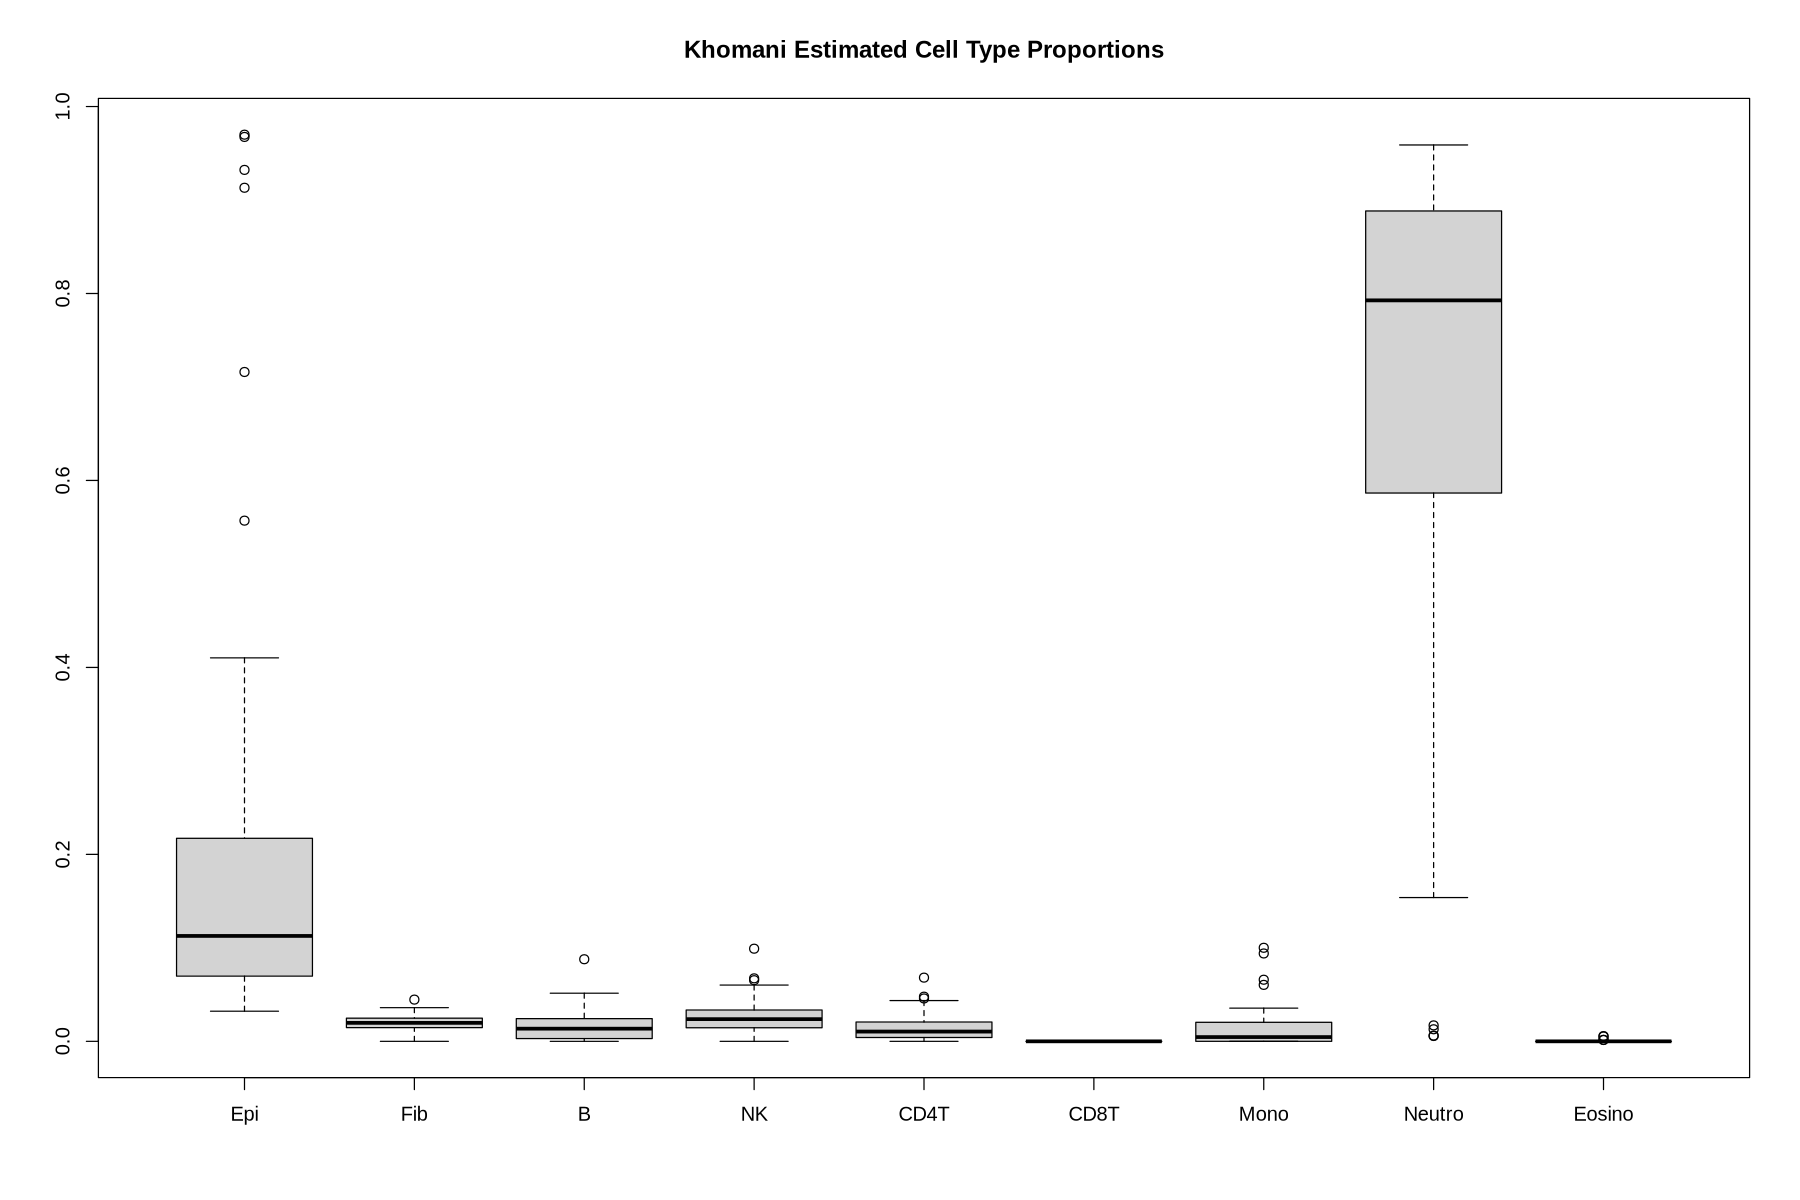

In [48]:
###KHS EPIDISH##############

library("EpiDISH")
data("centEpiFibIC.m")
data("centBloodSub.m")
Dat <- KHS_merged
Dat <- as.matrix(na.omit(Dat))
# #Reference based EPIDish  
# #very little fibroblasts, matches https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5644718/ proportions well
# #now do two-step framework to get specific blood cell type proportions
# #About 50% to 70% of all the white blood cells in your body should be neutrophils. Eosinophils should account for 1% to 3%, and basophils should make up approximately 0.4% to 1%.
frac.m <- hepidish(beta.m = Dat, ref1.m = centEpiFibIC.m, ref2.m = centBloodSub.m, h.CT.idx = 3, method='RPC')
boxplot(frac.m, main="Khomani Estimated Cell Type Proportions")
KHS_pheno_merged <- merge(KHS_pheno_merged, frac.m, by='row.names', all=T)
KHS_pheno_merged  <- KHS_pheno_merged [,-1]
row.names(KHS_pheno_merged) <- KHS_pheno_merged[,"IID"]

# # #very similar proportion for the repeat individualS
KHS_pheno_merged[KHS_pheno_merged$IID=="SA004","Neutro"]
KHS_pheno_merged[KHS_pheno_merged$IID=="SA004r","Neutro"] 
KHS_pheno_merged[KHS_pheno_merged$IID %in% c("SA004", "SA004r"),colnames(frac.m)]

#take out SA004r#
print(paste0("before taking out SA004r, KHS ncol=", ncol(KHS_merged)))
print(paste0("before taking out SA004r, KHS pheno rows=", nrow(KHS_pheno_merged)))
KHS_merged <- KHS_merged[,!colnames(KHS_merged) %in% c("SA004r")]
KHS_pheno_merged <- KHS_pheno_merged[!KHS_pheno_merged$IID == "SA004r", ]
print(paste0("after taking out SA004r, KHS ncol=", ncol(KHS_merged)))
print(paste0("after taking out SA004r, KHS pheno rows=", nrow(KHS_pheno_merged)))




[1] "before taking out Baka repeats, Baka ncol =37"
[1] "before taking out Baka repeats, Baka pheno rows =35"


,Epi,Fib,B,NK,CD4T,CD8T,Mono,Neutro,Eosino
B03F,0.12430878,0.02560976,0,0.01542369,0.004648064,0,0.01781489,0.8121948,0
B03Fr,0.12000772,0.02326507,0,0.01743471,0.010123347,0,0.01904034,0.8101288,0
B13F,0.03555314,0.01232134,0,0.00000000,0.000000000,0,0.00000000,0.9521255,0
B13Fr,0.03479523,0.01380155,0,0.00000000,0.000000000,0,0.00000000,0.9514032,0


[1] 35

[1] "after taking out Baka repeats, Baka ncol =35"
[1] "after taking out Baka repeats, Baka pheno rows =35"


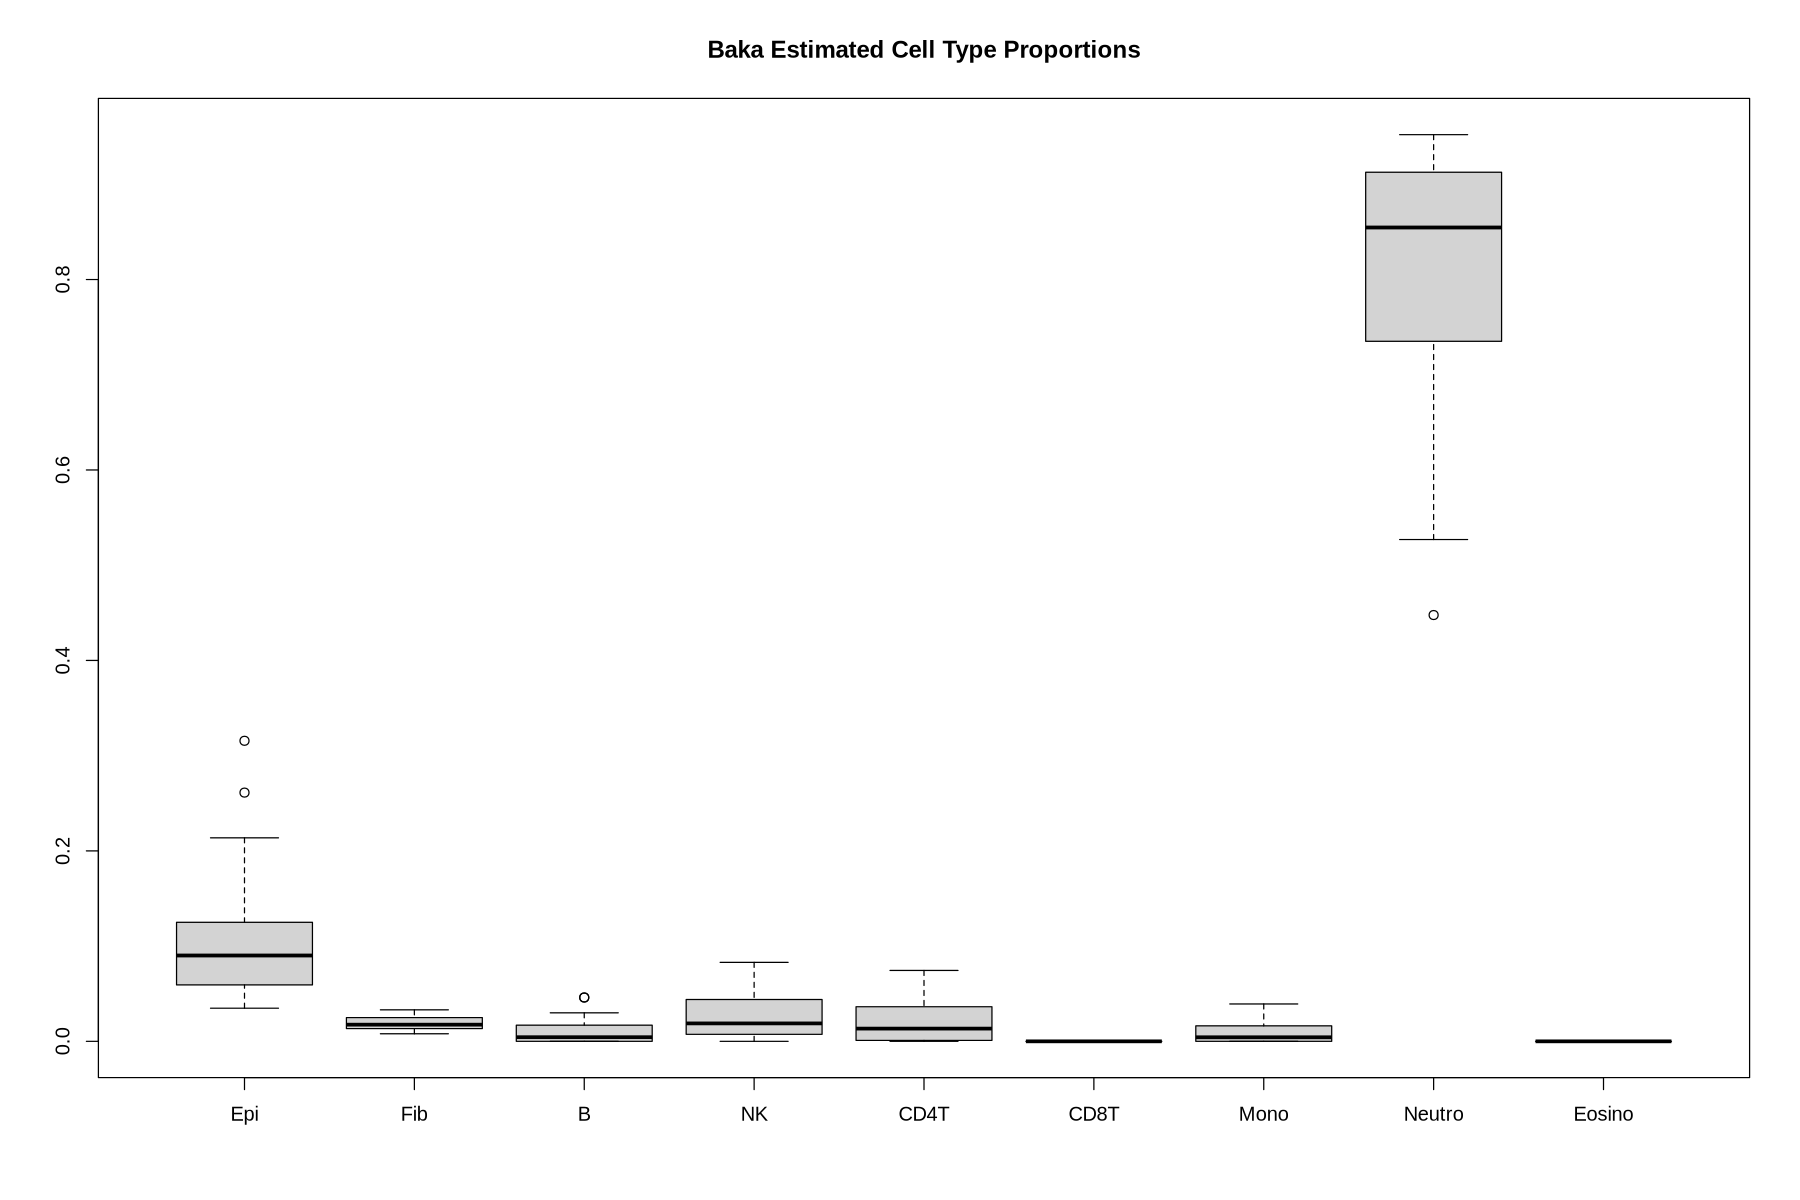

In [49]:
####Baka EPIDISH####
print(paste0("before taking out Baka repeats, Baka ncol =", ncol(Baka)))
print(paste0("before taking out Baka repeats, Baka pheno rows =", nrow(Baka_pheno)))
Dat <- Baka
Dat <- as.matrix(na.omit(Dat))
# #Reference based EPIDish  
frac.m <- hepidish(beta.m = Dat, ref1.m = centEpiFibIC.m, ref2.m = centBloodSub.m, h.CT.idx = 3, method='RPC')
boxplot(frac.m, main="Baka Estimated Cell Type Proportions")
#even higher similarity of proportion for those run on the same plate (the Baka duplicates) versus the SA004 on 2 plates
frac.m[rownames(frac.m)%in% c("B03F","B03Fr","B13F","B13Fr"),]
frac.m <- frac.m[!rownames(frac.m)%in% c("B03Fr","B13Fr"),]
nrow(frac.m)
Baka_pheno <- merge(Baka_pheno, frac.m, by='row.names', all=T)
Baka_pheno  <- Baka_pheno[,-1]

Baka <- Baka[, !colnames(Baka) %in% c("B03Fr","B13Fr")]
rownames(Baka_pheno) <- Baka_pheno[,"IID"]
print(paste0("after taking out Baka repeats, Baka ncol =", ncol(Baka)))
print(paste0("after taking out Baka repeats, Baka pheno rows =", nrow(Baka_pheno)))
# rownames(Baka_pheno) <- Baka_pheno$IID
# Baka_pheno <- Baka_pheno[,-1]
#35 Baka unique samples, 56 unique KHS samples with age 

ERROR: Error in eval(expr, envir, enclos): object 'KHS_pheno_merged' not found


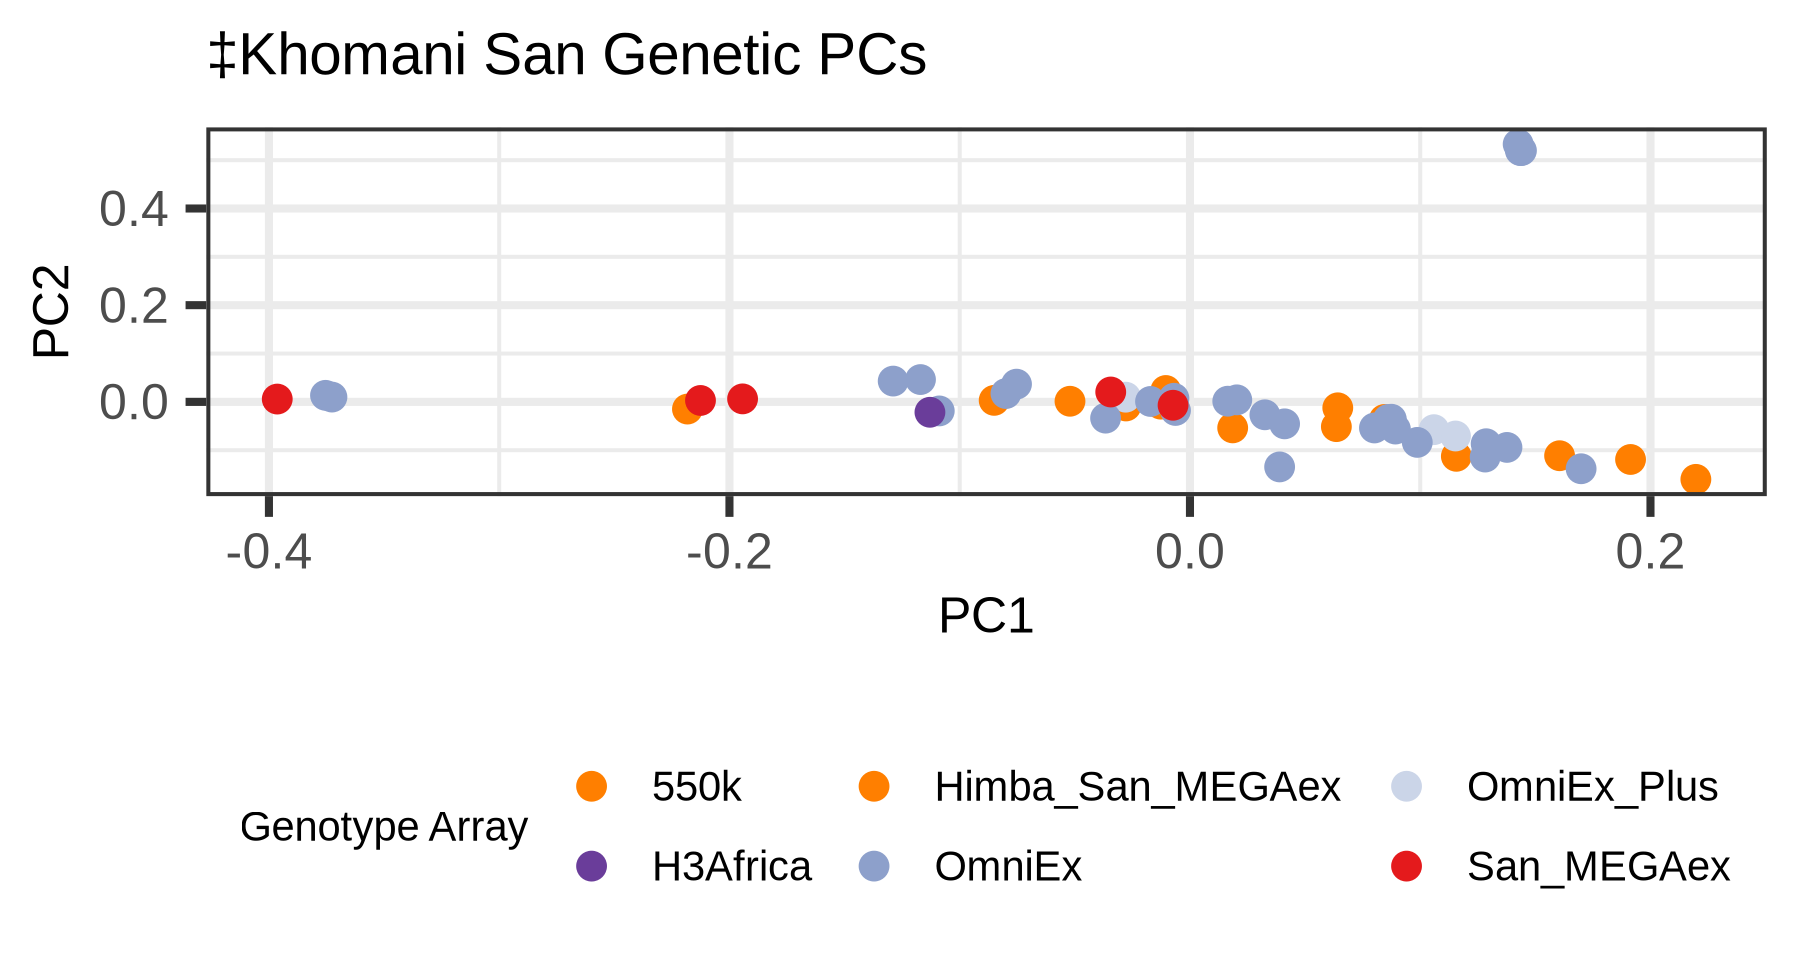

In [108]:
KHS_geno_PCs <- read.delim("ninety_five_KHS_merged_52_tagged_real_segregating_MAF05_LD03_5PCs.eigenvec", sep= " ", header=F)
colnames(KHS_geno_PCs) <- c("famID", "ID", "PC1_geno", "PC2_geno", "PC3_geno", "PC4_geno", "PC5_geno")
##10 samples have different IDs in methylation vs genotype data
# Genotype ID vs Methylation ID
# SA063 vs SA0632, SA064 vs SA0642, SA068 vs SA0682, SA069 vs SA0692, SA072 vs SA0722, SA074 vs SA0742, SA080 vs SA0802, SA085 vs SA0852, SA086 vs SA0862, SA095 vs SA0952
KHS_geno_PCs[KHS_geno_PCs$ID =="SA_SA003","ID"] <- "SA003"
KHS_geno_PCs[KHS_geno_PCs$ID =="SA_SA028","ID"] <- "SA028"
KHS_geno_PCs[KHS_geno_PCs$ID =="SA_SA029","ID"] <- "SA029"
KHS_geno_PCs[KHS_geno_PCs$ID =="SA063","ID"] <- "SA0632"
KHS_geno_PCs[KHS_geno_PCs$ID =="SA064","ID"] <- "SA0642"
KHS_geno_PCs[KHS_geno_PCs$ID =="SA068","ID"] <- "SA0682"
KHS_geno_PCs[KHS_geno_PCs$ID =="SA069","ID"] <- "SA0692"
KHS_geno_PCs[KHS_geno_PCs$ID =="SA072","ID"] <- "SA0722"
KHS_geno_PCs[KHS_geno_PCs$ID =="SA074","ID"] <- "SA0742"
KHS_geno_PCs[KHS_geno_PCs$ID =="SA080","ID"] <- "SA0802"
KHS_geno_PCs[KHS_geno_PCs$ID =="SA085","ID"] <- "SA0852"
KHS_geno_PCs[KHS_geno_PCs$ID =="SA086","ID"] <- "SA0862"
KHS_geno_PCs[KHS_geno_PCs$ID =="SA095","ID"] <- "SA0952"
rownames(KHS_geno_PCs) <- KHS_geno_PCs$ID

n <- length(unique(KHS_geno_PCs$famID))
qual_col_pals = brewer.pal.info[brewer.pal.info$category == 'qual',]
col_vector = unlist(mapply(brewer.pal, qual_col_pals$maxcolors, rownames(qual_col_pals)))
colors <- sample(col_vector,n)
options(repr.plot.width = 15, repr.plot.height = 8)

KHS_geno_PCs_plot <- ggplot(KHS_geno_PCs, aes(x = PC1_geno, y = PC2_geno, color = famID)) +
  geom_point(size = 8) +  # Plot the points
  xlab("PC1") + 
  ylab("PC2") + 
  scale_color_manual(values = colors, name = "Genotype Array") +  # Set legend title
  theme_bw() + 
  theme_bw(base_size = 50) + 
  theme(
    axis.text = element_text(size = 30),
    axis.title = element_text(size = 30, margin = margin(r = 10)),        
    plot.title = element_text(size = 35), 
    plot.margin = margin(t = 20, r = 20, b = 20, l = 20),
    legend.title = element_text(size = 25),  # Smaller legend title
    legend.text = element_text(size = 25),   # Smaller legend text
    legend.key.size = unit(1, "lines"),      # Smaller legend keys
    legend.position = "bottom"                # Position the legend on the right
  ) + ggtitle("\u2021Khomani San Genetic PCs")

KHS_legend <- get_legend(ggplot(KHS_geno_PCs, aes(x = PC1_geno, y = PC2_geno, color = famID)) +
  geom_point(size = 8) +  # Plot the points
  xlab("PC1") + 
  ylab("PC2") + 
  scale_color_manual(values = colors, name = "Genotype Array") +  # Set legend title
  theme_bw() + 
  theme_bw(base_size = 50) + 
  theme(
    axis.text = element_text(size = 30),
    axis.title = element_text(size = 30, margin = margin(r = 10)),        
    plot.title = element_text(size = 35), 
    plot.margin = margin(t = 20, r = 20, b = 20, l = 20),
    legend.title = element_text(size = 25),  # Smaller legend title
    legend.text = element_text(size = 25),   # Smaller legend text
    legend.key.size = unit(1, "lines"),      # Smaller legend keys
    legend.position = "none"                # Position the legend on the right
  ) + ggtitle("\u2021Khomani San Genetic PCs"))

KHS_geno_PCs_plot 
#merge in geno PCs
KHS_pheno_merged <- KHS_pheno_merged[KHS_pheno_merged$IID %in% KHS_geno_PCs$ID,]
rownames(KHS_pheno_merged) <- KHS_pheno_merged$IID
KHS_pheno_merged <- merge(KHS_pheno_merged, KHS_geno_PCs, by='row.names', all=TRUE)
rownames(KHS_pheno_merged) <- KHS_pheno_merged$IID
KHS_pheno_merged <- KHS_pheno_merged[,-1]
#only keep the mehthylation data for inds with geno PCs (drop 4)
KHS_merged <- KHS_merged[,colnames(KHS_merged) %in% rownames(KHS_pheno_merged)]
head(KHS_merged)
head(KHS_pheno_merged)


In [51]:
##KHS do ctrl probe PCA and merge in ctrl probe PCs
pca <- prcomp(na.omit(KHS_pheno_merged[,colnames(KHS_pheno_merged)%in% colnames(ctrl_)]))
scores = pca$x
colnames(scores) = paste(colnames(scores), '_cp', sep='')
KHS_pheno_merged <- merge(KHS_pheno_merged, scores[,1:20], by=0, all=TRUE)
rownames(KHS_pheno_merged) <- KHS_pheno_merged[,"IID"]
KHS_pheno_merged <- KHS_pheno_merged[,-1]

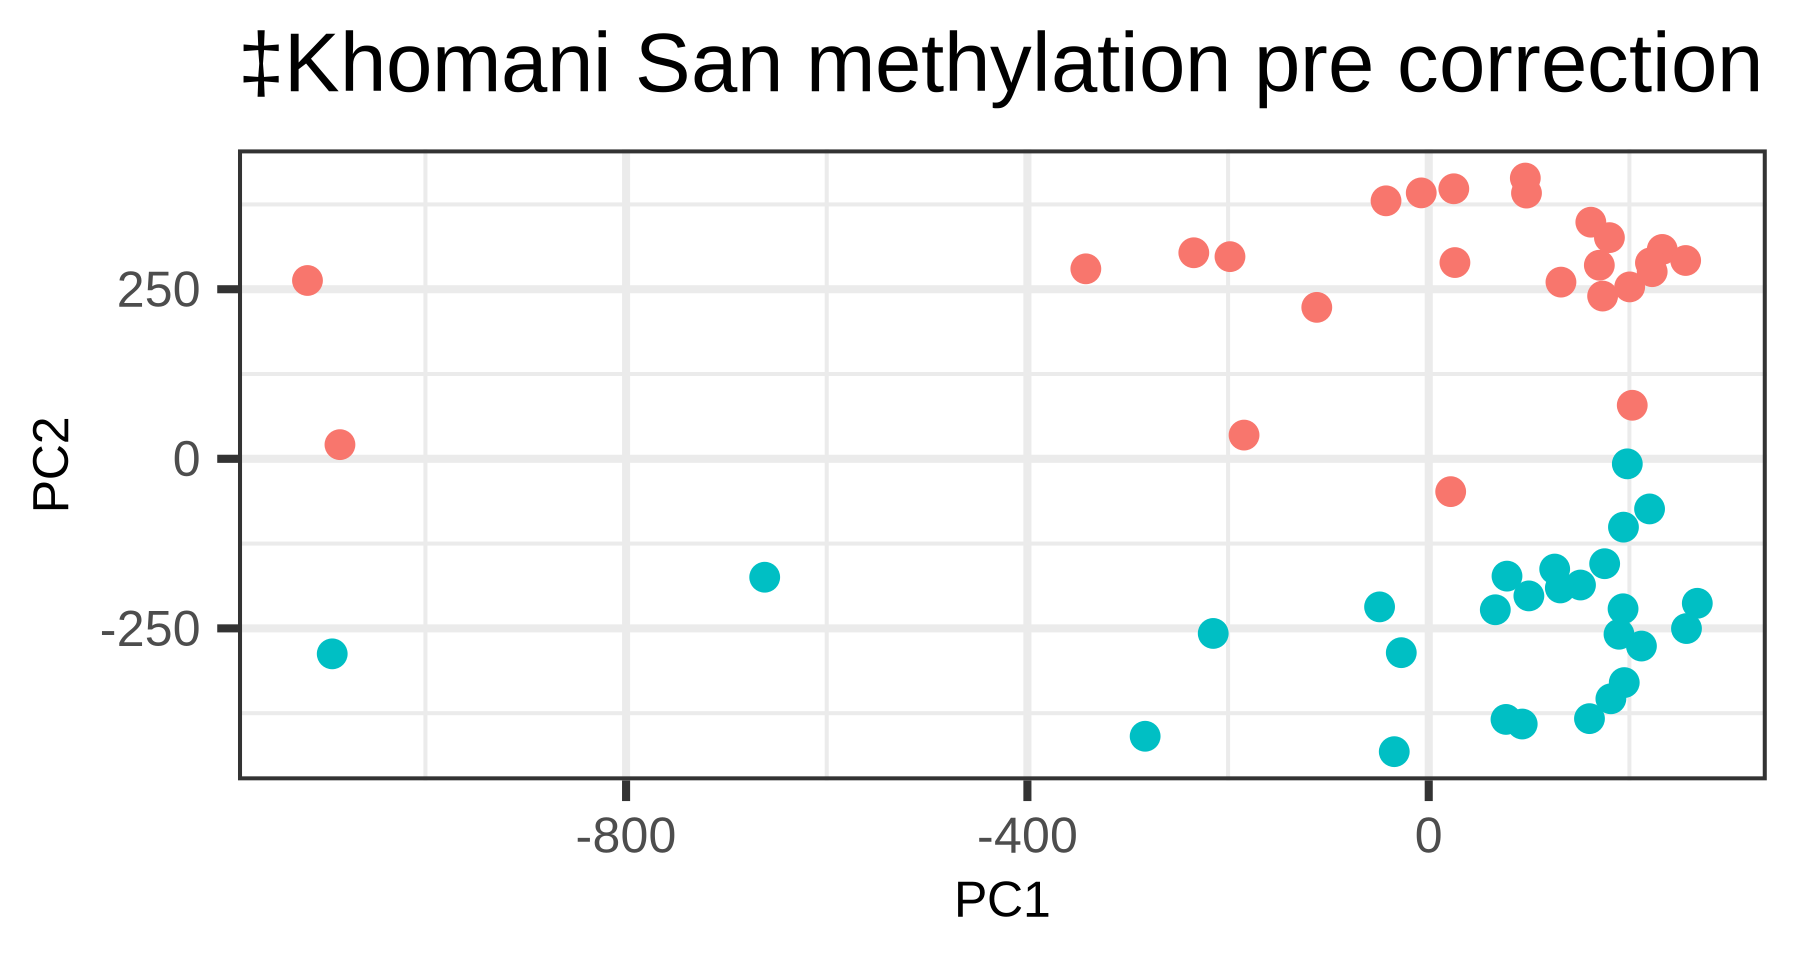

In [52]:
##KHS
library(ggfortify)
KHS_merged_t <- as.data.frame(t(na.omit(KHS_merged)))
#KHS_merged_t <- KHS_merged_t[,1:test_data]
KHS_merged_t <- KHS_merged_t[rownames(KHS_merged_t) %in% rownames(KHS_pheno_merged),]
KHS_merged_t <- merge(KHS_merged_t, KHS_pheno_merged, by='row.names', all=TRUE)
rownames(KHS_merged_t) <- KHS_merged_t[,"IID"]
KHS_merged_t <- KHS_merged_t[,-1]

for_pc <- KHS_merged_t[,grepl("cg", colnames(KHS_merged_t))]

KHS_pca <- prcomp(for_pc, center=TRUE, scale=TRUE)
# Extract the PCA scores
pca_scores <- as.data.frame(KHS_pca$x)

# Add metadata to the PCA scores
pca_scores <- cbind(pca_scores, KHS_merged_t)

# Create the PCA plot using ggplot
pre_ctrl_probe_KHS <- ggplot(pca_scores, aes(x = PC1, y = PC2, color = acc_num)) +
  geom_point(size = 8) +
  xlab("PC1") + 
  ylab("PC2") + 
  theme_bw() + 
  theme_bw(base_size = 50) + 
  theme(
    axis.text = element_text(size = 30),
    axis.title = element_text(size = 30, margin = margin(r = 10)),        
    plot.title = element_text(size = 50), 
    plot.margin = margin(t = 20, r = 20, b = 20, l = 20),
    legend.title = element_text(size = 20),  # Smaller legend title
    legend.text = element_text(size = 15),   # Smaller legend text
    legend.key.size = unit(1, "lines"),      # Smaller legend keys
    legend.position = "none"                # Position the legend on the right
  ) + ggtitle("\u2021Khomani San methylation pre correction")
pre_ctrl_probe_KHS 
KHS_pca_scores <- KHS_pca$x
colnames(KHS_pca_scores) = paste(colnames(KHS_pca_scores), '_meth', sep='')

for_pc <- merge(KHS_pca_scores[,1:10], KHS_pheno_merged, by='row.names')
for_pc <- merge(KHS_pca_scores[,1:10], KHS_pheno_merged, by='row.names')

rownames(for_pc) <- for_pc[,"IID"]
for_pc <- for_pc[,-1]


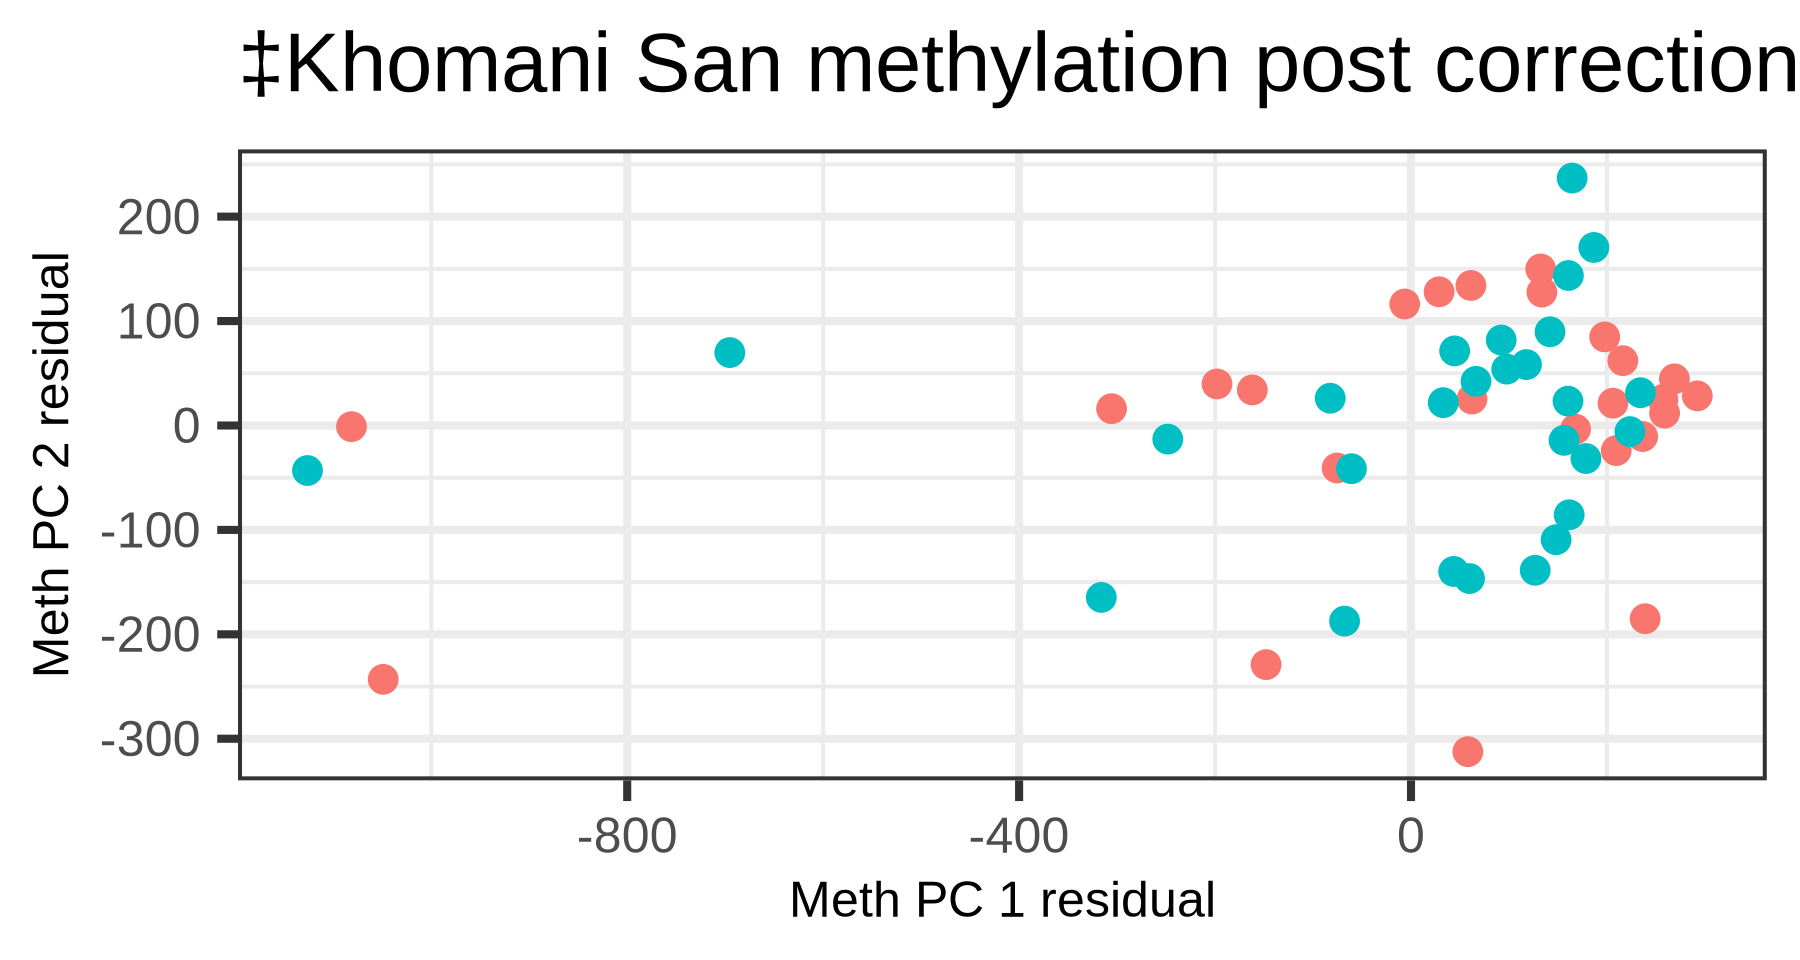

In [53]:
#regress out ctrl probes
#pc_regress_1 <- lm(PC1_meth ~ PC1_cp + PC2_cp + PC3_cp + PC4_cp + PC5_cp + PC6_cp + PC7_cp + PC8_cp + PC9_cp + PC10_cp , data=for_pc)
#pc_regress_2 <- lm(PC2_meth ~ PC1_cp + PC2_cp + PC3_cp + PC4_cp + PC5_cp + PC6_cp + PC7_cp + PC8_cp + PC9_cp + PC10_cp, data=for_pc)
pc_regress_1 <- lm(PC1_meth ~ acc_num , data=for_pc)
pc_regress_2 <- lm(PC2_meth ~ acc_num , data=for_pc)



#tesing random variables doens't eliminate it
#pc_regress_1 <- lm(PC1_meth ~ sex + age + Neutro + PC1_geno, data=for_pc)
#pc_regress_2 <- lm(PC2_meth ~ sex + age + Neutro + PC1_geno, data=for_pc)

pc1_resid <- residuals(pc_regress_1) 
regress_ctr_resid_1 <- as.data.frame(pc1_resid)
pc2_resid <- residuals(pc_regress_2) 
regress_ctr_resid_2 <- as.data.frame(pc2_resid)
resid <- merge(regress_ctr_resid_1,regress_ctr_resid_2, by=0, all=TRUE)
rownames(KHS_pheno_merged) <- KHS_pheno_merged[,"IID"]
rownames(resid) <- resid[,1]
resid <- resid[,-1]
resid <- merge(resid, for_pc, by=0, all=TRUE)
rownames(resid) <- resid[,1]
post_ctrl_probe_KHS <- ggplot(resid, aes(x=pc1_resid , y=residuals(pc_regress_2), color=acc_num, label=rownames(resid)))+ #+ geom_text(size=5, vjust="inward",hjust="inward") +
  theme_bw() + 
  theme_bw(base_size = 50) + 
  theme(
    axis.text = element_text(size = 30),
    axis.title = element_text(size = 30, margin = margin(r = 10)),        
    plot.title = element_text(size = 50), 
    plot.margin = margin(t = 20, r = 20, b = 20, l = 20),
    legend.title = element_text(size = 20),  # Smaller legend title
    legend.text = element_text(size = 15),   # Smaller legend text
    legend.key.size = unit(1, "lines"),      # Smaller legend keys
    legend.position = "none"                # Position the legend on the right
  ) + geom_point(size=8) + xlab("Meth PC 1 residual") +  # Change the x-axis label
  ylab("Meth PC 2 residual") + ggtitle("\u2021Khomani San methylation post correction")

KHS_pheno_merged <- for_pc

post_ctrl_probe_KHS 

ERROR: Error in eval(expr, envir, enclos): object 'Baka_pheno' not found


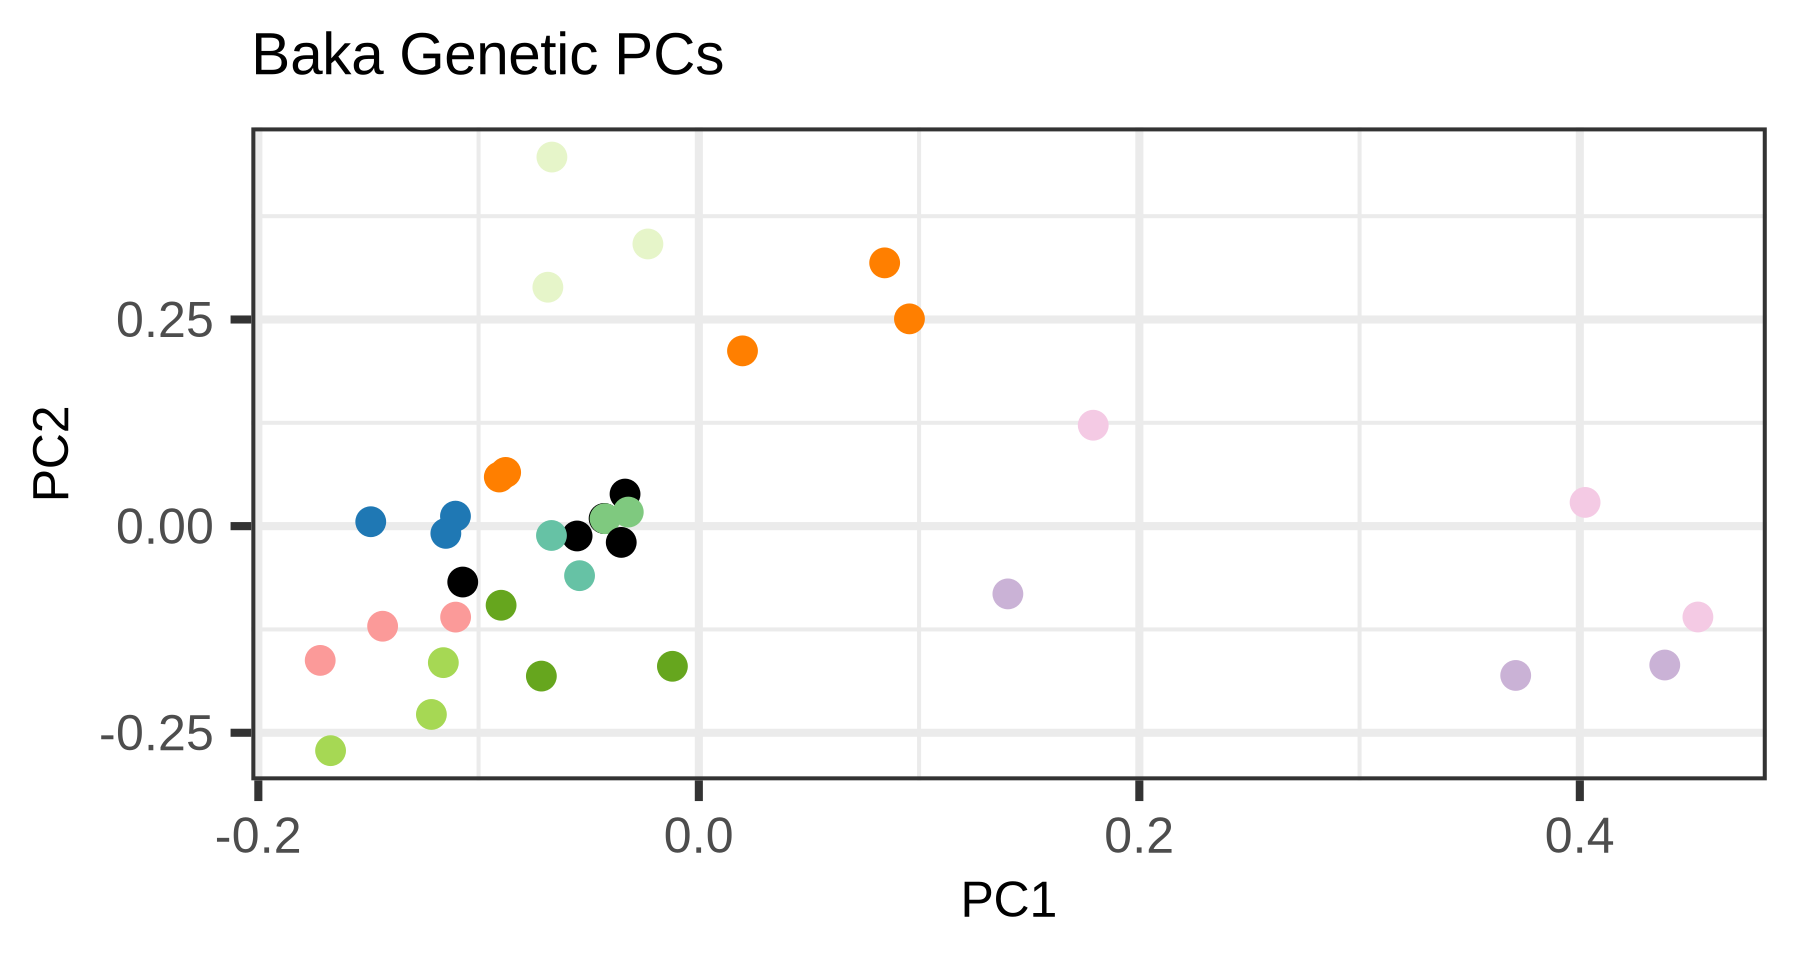

In [123]:
#Baka Geno PCs
# Load and preprocess the data
Baka_geno_PCs <- read.delim("Baka_ninety_five_tagged_35_real_segregating_MAF05_LD03_5PCs.eigenvec", sep= " ", header=F)
colnames(Baka_geno_PCs) <- c("famID", "ID", "PC1_geno", "PC2_geno", "PC3_geno", "PC4_geno", "PC5_geno")
rownames(Baka_geno_PCs) <- Baka_geno_PCs$ID

# Get the number of unique family IDs excluding "No_Trio"
unique_famIDs <- unique(Baka_geno_PCs$famID)
n <- length(unique_famIDs) - 1  # Exclude "No_Trio"

# Generate a color palette
qual_col_pals <- brewer.pal.info[brewer.pal.info$category == 'qual',]
col_vector <- unlist(mapply(brewer.pal, qual_col_pals$maxcolors, rownames(qual_col_pals)))

# Assign random colors to the family IDs except "No_Trio"
colors <- sample(col_vector, n)
colors <- c(colors, "black")  # Add grey for "No_Trio"

# Create a named vector of colors
color_mapping <- setNames(colors, c(setdiff(unique_famIDs, "No_Trio"), "No_Trio"))

# Plot
options(repr.plot.width = 15, repr.plot.height = 8)

Baka_geno_PCs_plot <- ggplot(Baka_geno_PCs, aes(x = PC1_geno, y = PC2_geno, color = famID)) +
  geom_point(size = 8) +  # Plot the points
  xlab("PC1") + 
  ylab("PC2") + 
  scale_color_manual(values = color_mapping, name = "Family ID") +  # Set legend title
  theme_bw() + 
  theme_bw(base_size = 50) + 
  theme(
    axis.text = element_text(size = 30),
    axis.title = element_text(size = 30, margin = margin(r = 10)),        
    plot.title = element_text(size = 35), 
    plot.margin = margin(t = 20, r = 20, b = 20, l = 20),
    legend.title = element_text(size = 25),  # Legend title size
    legend.text = element_text(size = 25),   # Legend text size
    legend.key.size = unit(1, "lines"),      # Legend key size
    legend.position = "none"                # Position the legend on the right
  ) + ggtitle("Baka Genetic PCs")

# Display the plot
print(Baka_geno_PCs_plot)

#merge in geno PCs
Baka_pheno <- Baka_pheno[Baka_pheno$IID %in% Baka_geno_PCs$ID,]
rownames(Baka_pheno) <- Baka_pheno$IID
Baka_pheno <- merge(Baka_pheno, Baka_geno_PCs, by='row.names', all=TRUE)
rownames(Baka_pheno) <- Baka_pheno$IID
Baka_pheno <- Baka_pheno[,-1]


In [88]:
#Baka Ctrl probe PCs
pca <- prcomp(na.omit(Baka_pheno[,colnames(Baka_pheno)%in% colnames(ctrl_)]))
scores = pca$x
colnames(scores) = paste(colnames(scores), '_cp', sep='')
Baka_pheno <- merge(Baka_pheno, scores[,1:20], by=0, all=TRUE)
rownames(Baka_pheno) <- Baka_pheno[,"IID"]
Baka_pheno <- Baka_pheno[,-1]


ERROR: Error in svd(x, nu = 0, nv = k): a dimension is zero


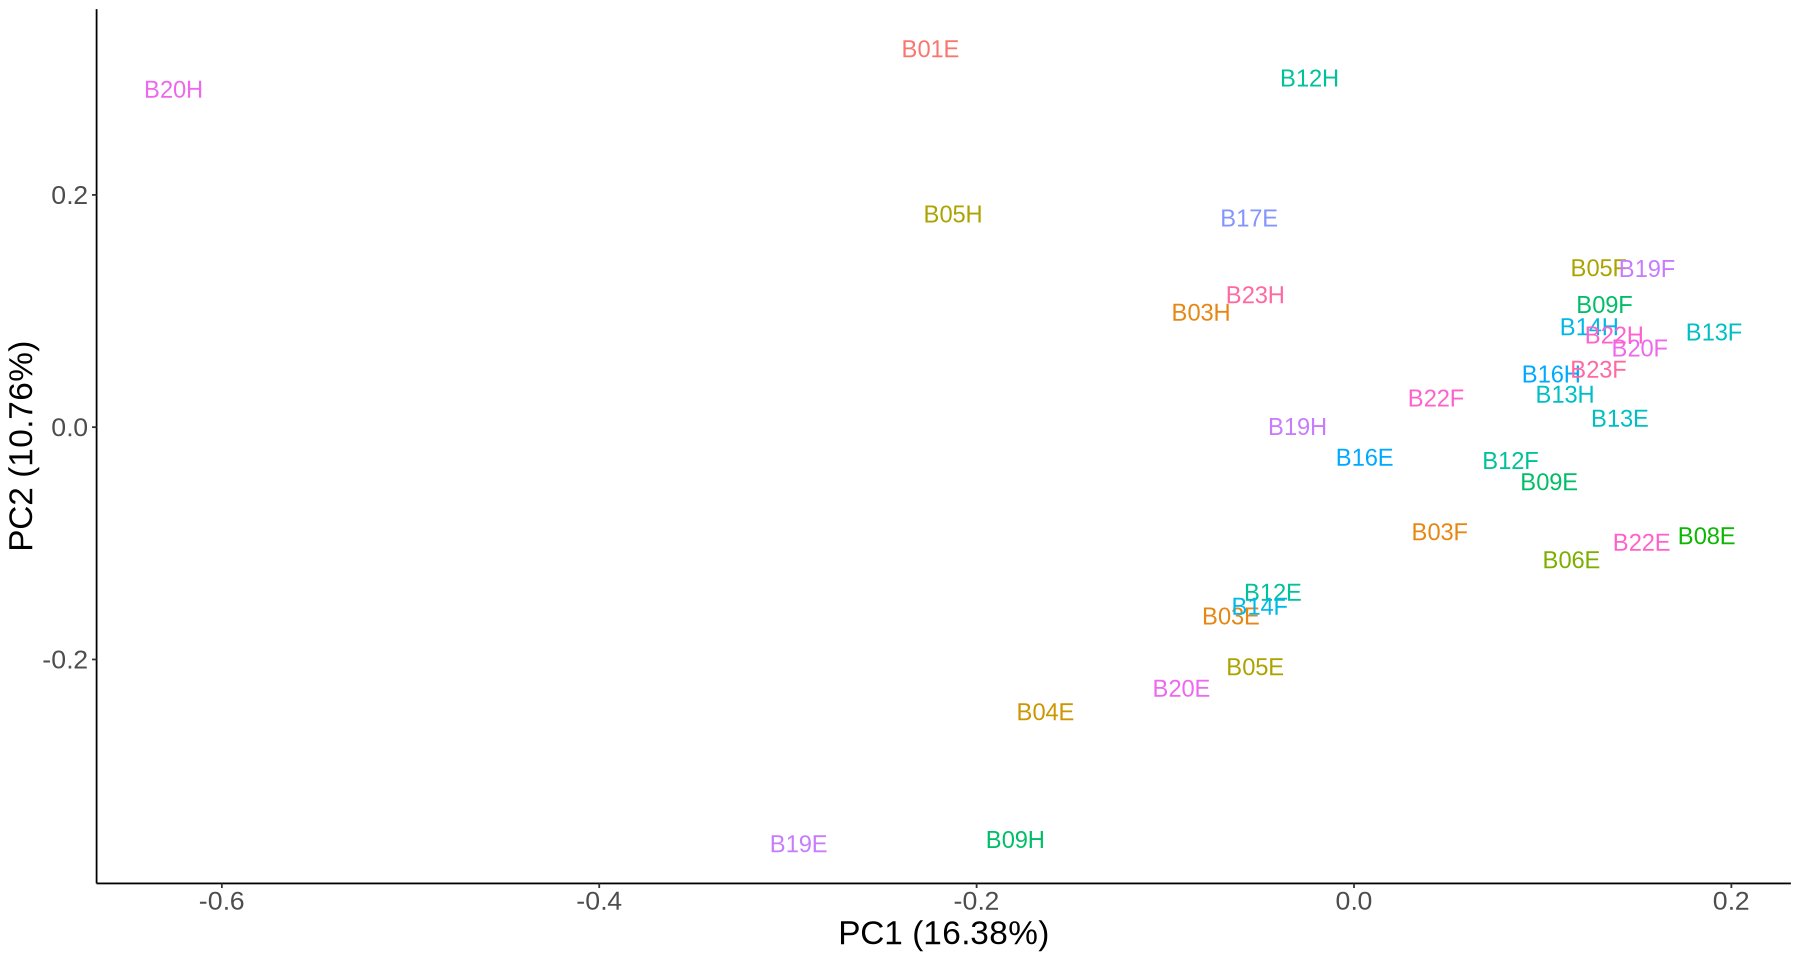

In [89]:
#Baka plot raw methylation Pcs
Baka_t <- as.data.frame(t(na.omit(Baka)))
#Baka_t <- Baka_t[,1:test_data]
Baka_t <- Baka_t[rownames(Baka_t) %in% rownames(Baka_pheno),]
Baka_t <- merge(Baka_t, Baka_pheno, by='row.names', all=TRUE)
rownames(Baka_t) <- Baka_t[,"IID"]
Baka_t <- Baka_t[,-1]

for_pc <- Baka_t[,grepl("cg", colnames(Baka_t))]
Baka_pca <- prcomp(for_pc, center=TRUE, scale=TRUE)
autoplot(Baka_pca, x=1, y=2, data=Baka_t, shape=FALSE, colour='group', label=TRUE, label.size=5) +
theme(panel.grid.major = element_blank(), panel.grid.minor = element_blank(),
panel.background = element_blank(), axis.line = element_line(colour = "black"), legend.position="none",
     text = element_text(size = 20))

Baka_pca_scores <- Baka_pca$x
colnames(Baka_pca_scores) = paste(colnames(Baka_pca_scores), '_meth', sep='')
for_pc <- merge(Baka_pca_scores[,1:10], Baka_pheno, by='row.names')
rownames(for_pc) <- for_pc[,"IID"]
for_pc <- for_pc[,-1]
Baka_pheno <- for_pc 


In [90]:
#regress out ctrl probes
pc_regress_1 <- lm(PC1_meth ~ PC1_cp + PC2_cp + PC3_cp + PC4_cp + PC5_cp + PC6_cp + PC7_cp + PC8_cp + PC9_cp + PC10_cp , data=for_pc)
pc_regress_2 <- lm(PC2_meth ~ PC1_cp + PC2_cp + PC3_cp + PC4_cp + PC5_cp + PC6_cp + PC7_cp + PC8_cp + PC9_cp + PC10_cp, data=for_pc)

#tesing random variables doens't eliminate it
pc_regress_1 <- lm(PC1_meth ~ sex + age + Neutro + PC1_geno, data=for_pc)
pc_regress_2 <- lm(PC2_meth ~ sex + age + Neutro + PC1_geno, data=for_pc)
pc1_resid <- residuals(pc_regress_1) 
regress_ctr_resid_1 <- as.data.frame(pc1_resid)
pc2_resid <- residuals(pc_regress_2) 
regress_ctr_resid_2 <- as.data.frame(pc2_resid)
resid <- merge(regress_ctr_resid_1,regress_ctr_resid_2, by=0, all=TRUE)
rownames(Baka_pheno) <- Baka_pheno[,"IID"]
rownames(resid) <- resid[,1]
resid <- resid[,-1]
resid <- merge(resid, for_pc, by=0, all=TRUE)
rownames(resid) <- resid[,1]
ggplot(resid, aes(x=pc1_resid , y=residuals(pc_regress_2), color=group, label=rownames(resid))) + geom_text(size=5, vjust="inward",hjust="inward") +
theme(panel.grid.major = element_blank(), panel.grid.minor = element_blank(),
panel.background = element_blank(), axis.line = element_line(colour = "black"), legend.position="none",
     text = element_text(size = 20)) + labs(x="PC1 residuals", y="PC2 residuals") 

ERROR: Error in eval(predvars, data, env): object 'PC1_meth' not found


In [113]:
###Himba########## 51 unique Himba samples, but HMB181 taken on both batches 3 years apart samples#####################################
load("Himba_Batch1_BMIQ_norm.RData")
Himba1 <- Dat.funnorm.waNorm.dpvalsMasked
Himba1_pheno <- pheno.new
rownames(Himba1_pheno) <- Himba1_pheno$ID
ctrl_ <- t(ctrl_)
Himba1_pheno <- merge(Himba1_pheno, ctrl_, by=0, row.names=1)
rownames(Himba1_pheno) <- Himba1_pheno$ID
Himba1_pheno <- Himba1_pheno[,-1]
Himba1_pheno$acc_num <-"Batch 1"

load("Himba_Batch2_BMIQ_norm.RData")
Himba2 <- Dat.funnorm.waNorm.dpvalsMasked
colnames(Himba2)[which(names(Himba2)=="HMB181")] <- 'HMB181_2'
Himba2_pheno <- pheno.new
Himba2_pheno$ID <- Himba2_pheno$Sample_Name
rownames(Himba2_pheno) <- Himba2_pheno$ID
ctrl_ <- t(ctrl_)
Himba2_pheno <- merge(Himba2_pheno, ctrl_, by=0, row.names=1)
rownames(Himba2_pheno) <- Himba2_pheno$ID
Himba2_pheno <- Himba2_pheno[,-1]
Himba2_pheno$acc_num <-"Batch 2"
Himba2_pheno 
Himba2_pheno[Himba2_pheno$ID == "HMB181", "ID"] <- 'HMB181_2'
Himba2_pheno <- Himba2_pheno[,-1]
rownames(Himba2_pheno) <- Himba2_pheno$ID
common_cols <- intersect(colnames(Himba1_pheno), colnames(Himba2_pheno))
Himba_pheno_merged <- rbind(
  subset(Himba1_pheno, select = common_cols), 
  subset(Himba2_pheno, select = common_cols)
)
rownames(Himba_pheno_merged) <- Himba_pheno_merged$ID


,Sample_Name,age,sex,Array,Slide,mMed,uMed,predictedSex,predictedAge,ID,...,Norm_T28,Norm_T59,Norm_T33,Norm_T52,Norm_T37,Norm_T45,Norm_T20,Norm_T3,Norm_T35,acc_num
,<chr>,<int>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<dbl>,<chr>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
HMB013,HMB013,13,M,R01C01,203841950142,12.58191,11.82575,M,4.806445,HMB013,...,8550,7326,10952,8782,12677,6253,4279,8595,7803,Batch 2
HMB014,HMB014,34,M,R02C01,203841950142,12.28511,11.59852,M,46.390716,HMB014,...,6798,5390,9871,5998,11025,5142,3012,7020,5080,Batch 2
HMB025,HMB025,36,F,R03C01,203841950142,12.28367,11.44915,F,32.225753,HMB025,...,5531,4392,9015,5253,9972,5062,2863,6463,5062,Batch 2
HMB030,HMB030,70,F,R04C01,203841950142,12.66356,11.71896,F,63.348824,HMB030,...,7714,5273,9391,7394,11449,5921,3272,7093,6015,Batch 2
HMB031,HMB031,48,M,R01C01,203841950124,12.24228,11.39339,M,48.345704,HMB031,...,6269,4723,7754,5688,9145,5012,2441,6563,4741,Batch 2
HMB040,HMB040,23,M,R02C01,203841950124,12.35232,11.55075,M,29.815564,HMB040,...,7488,5223,9502,5967,9904,5062,2316,6919,5012,Batch 2
HMB051,HMB051,66,F,R03C01,203841950124,12.60525,11.56463,F,47.183124,HMB051,...,7128,5434,9073,7225,11394,6326,3498,7596,6397,Batch 2
HMB062,HMB062,63,M,R04C01,203841950124,12.76321,11.75614,M,66.123847,HMB062,...,8599,5545,9978,7424,11445,6736,3899,8858,6661,Batch 2
HMB072,HMB072,78,F,R01C01,203841950104,12.12153,11.40195,F,61.440412,HMB072,...,6685,4564,8528,5742,9323,5194,2414,6147,4962,Batch 2


In [114]:
Himba_merged <- merge(Himba1, Himba2, by='row.names', row.names=1)
rownames(Himba_merged) <- Himba_merged[,1]
Himba_merged <- Himba_merged[,-1]#check ICC for the repeat and then remove SA004r
icc(meth=na.omit(Himba_merged[,c("HMB181", "HMB181_2")]), model= "oneway")
#icc(meth=na.omit(Himba_merged[1:test_data,c("HMB181", "HMB181_2")]), model= "oneway")
#icc(meth=na.omit(Himba_merged[1:test_data,], model= "oneway"))
#remove SNP probes Himba
print(paste0("Himba probes pre-probe SNP prune:", nrow(Himba_merged)))
Himba_merged <- Himba_merged[!rownames(Himba_merged) %in% MAF05_SNP_himba.probes,]
print(paste0("Himba probes post-probe SNP prune:", nrow(Himba_merged)))
length(MAF05_SNP_himba.probes)
Himba_pheno_merged[Himba_pheno_merged$ID %in% c("HMB181", "HMB181_2"),]

ERROR: Error in icc(meth = na.omit(Himba_merged[, c("HMB181", "HMB181_2")]), : could not find function "icc"


,Epi,Fib,B,NK,CD4T,CD8T,Mono,Neutro,Eosino
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
HMB181,0.01672389,0.01083108,0,0.004981648,0,0,0,0.9674634,0
HMB181_2,0.01970484,0.01264670,0,0.003465940,0,0,0,0.9641825,0


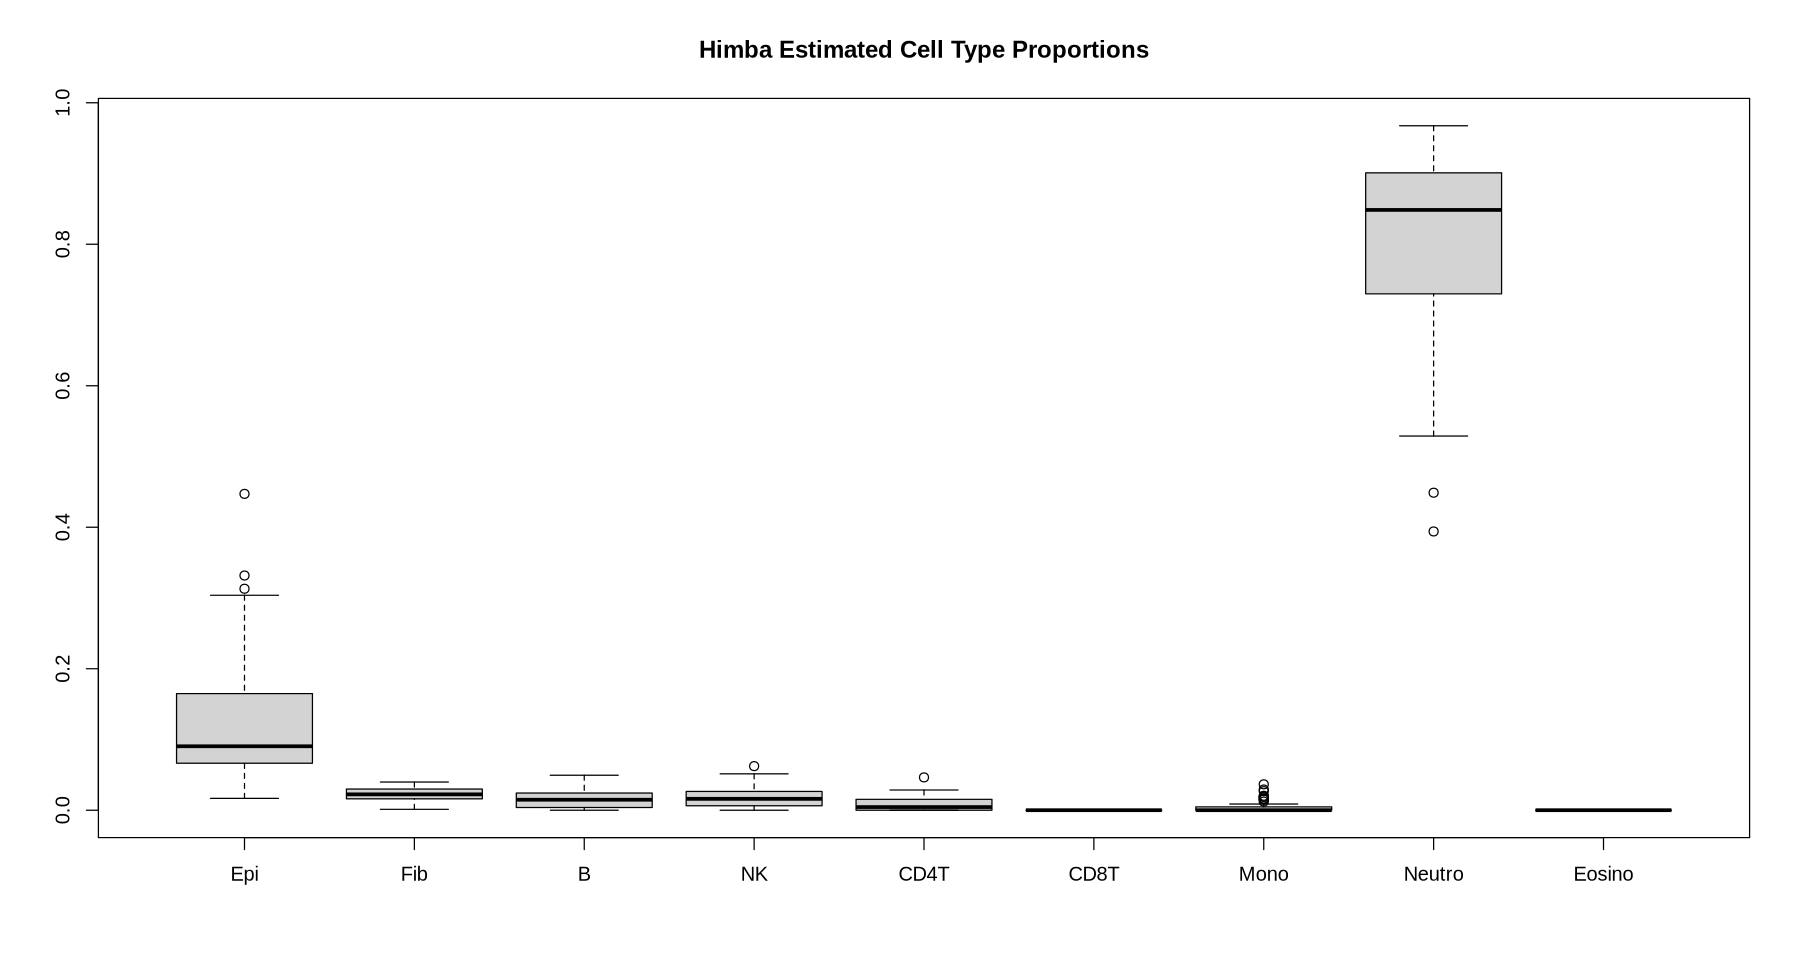

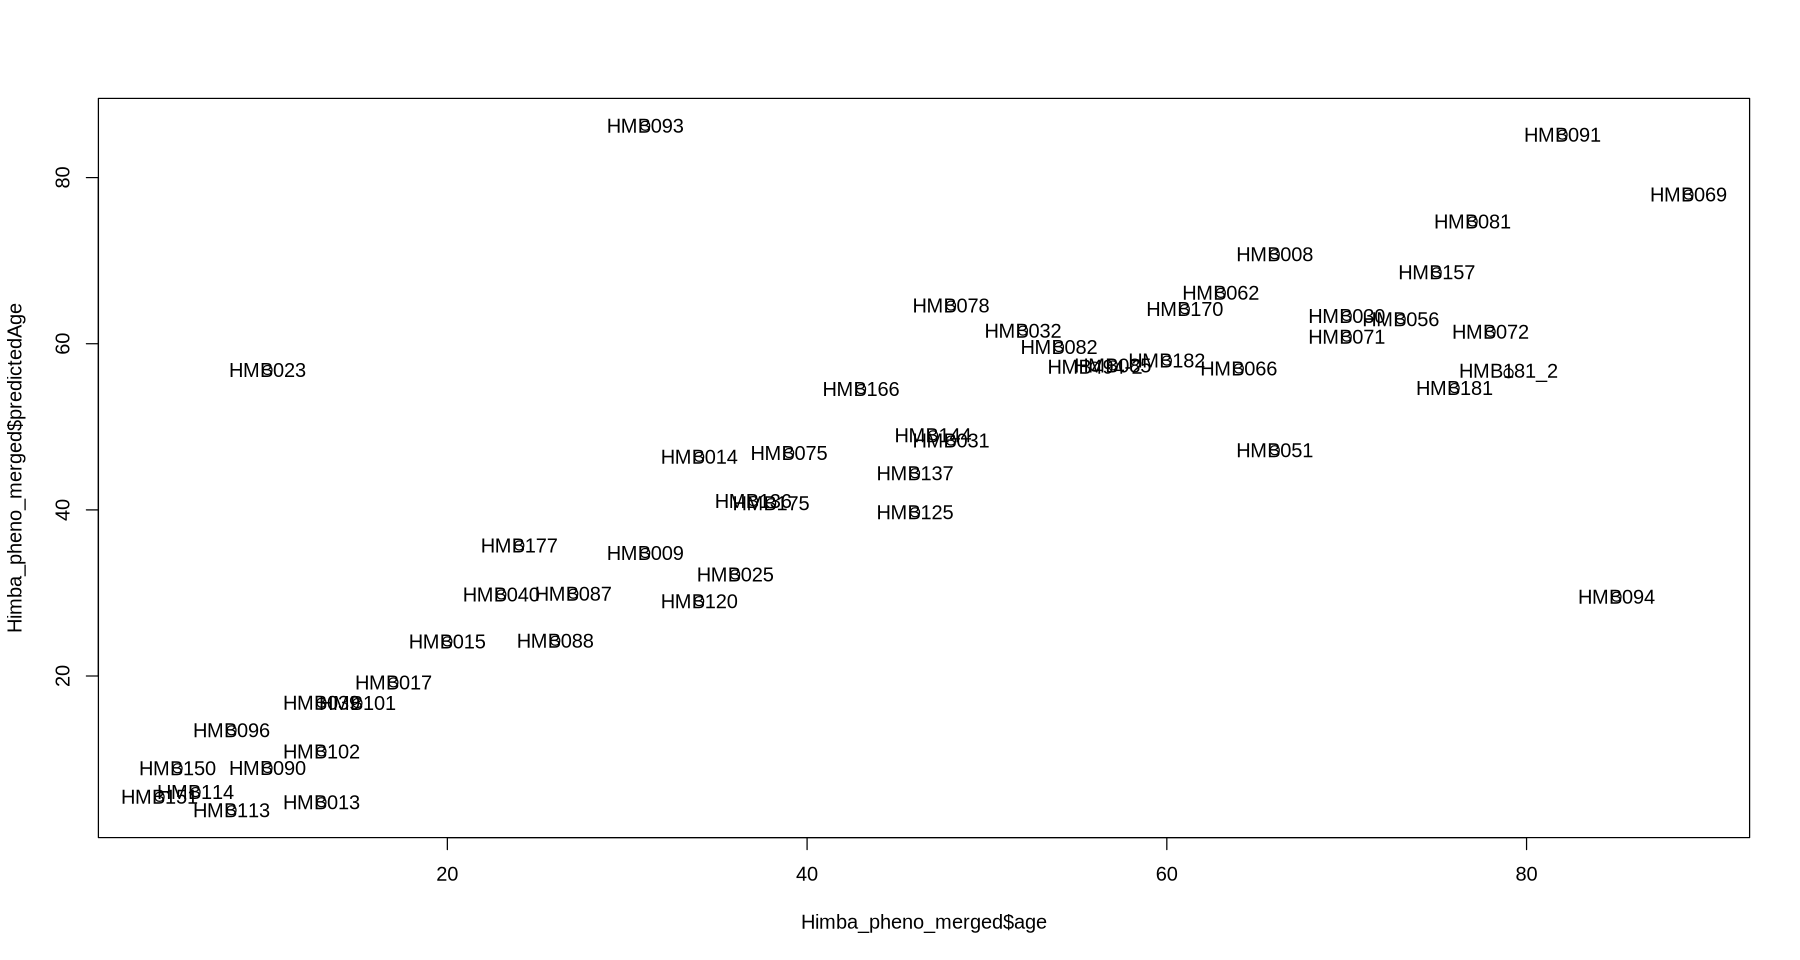

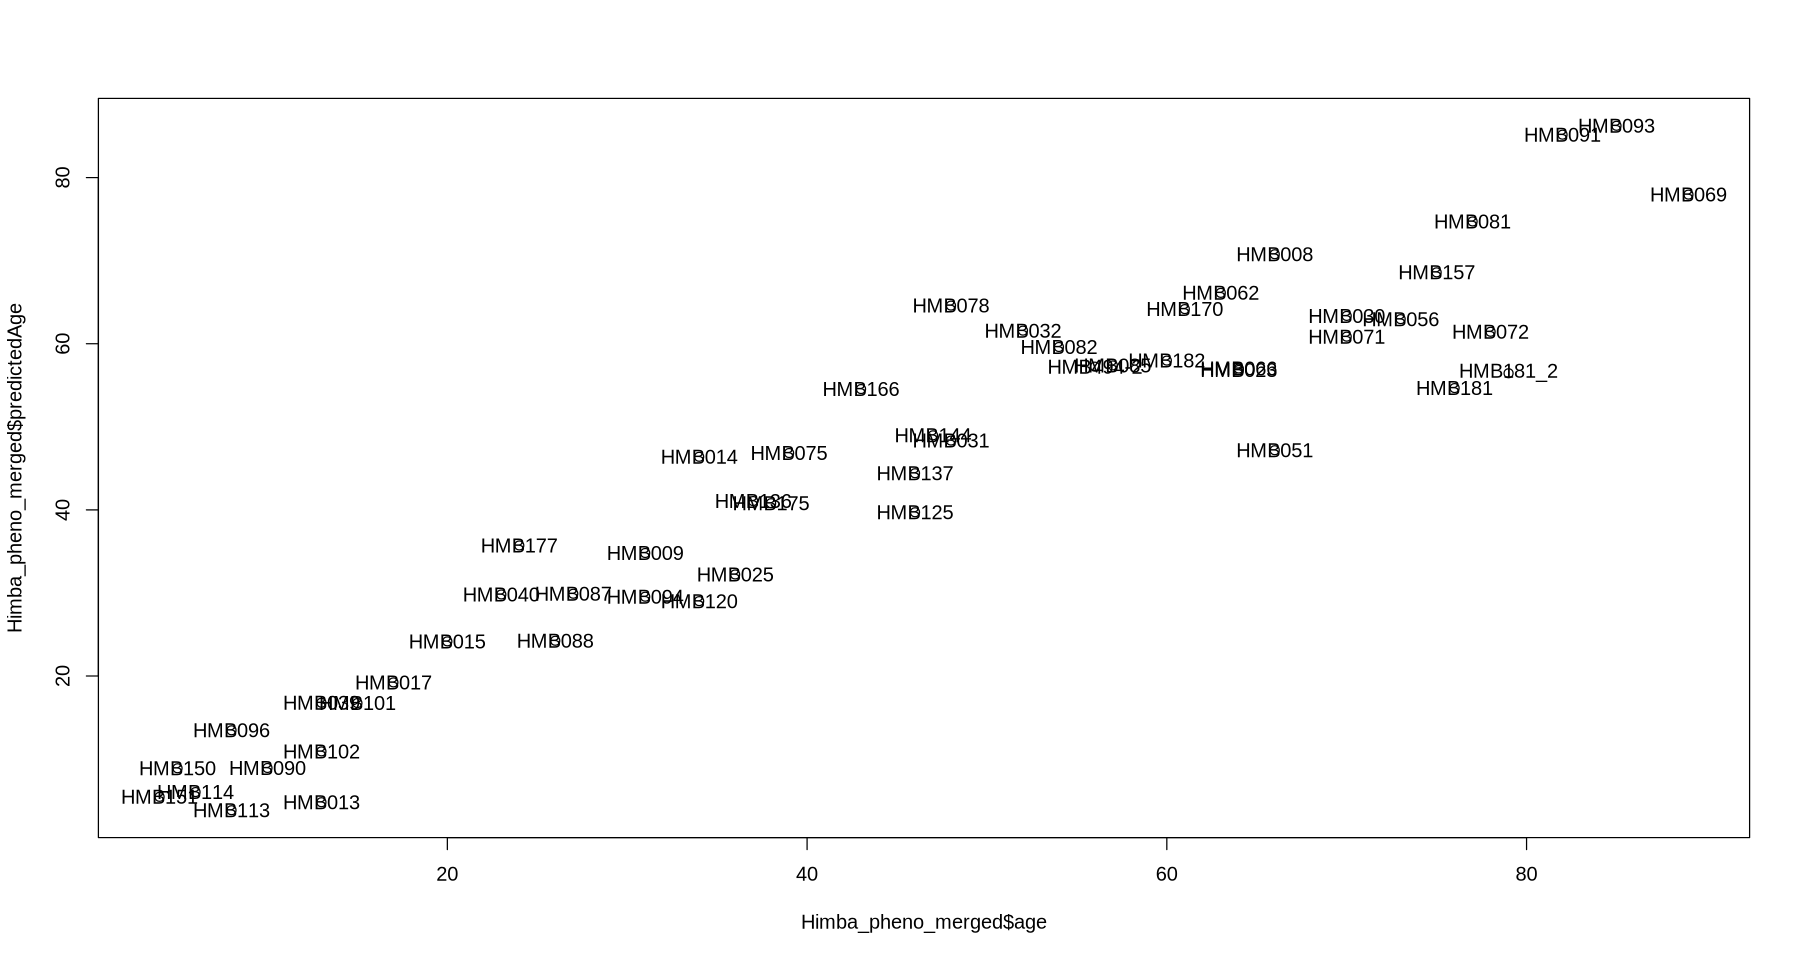

In [115]:
###Himba EPIDISH##############
data("centEpiFibIC.m")
data("centBloodSub.m")
Dat <- Himba_merged
Dat <- as.matrix(na.omit(Dat))
# #Reference based EPIDish  
# #very little fibroblasts, matches https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5644718/ proportions well
# #now do two-step framework to get specific blood cell type proportions
# #About 50% to 70% of all the white blood cells in your body should be neutrophils. Eosinophils should account for 1% to 3%, and basophils should make up approximately 0.4% to 1%.
frac.m <- hepidish(beta.m = Dat, ref1.m = centEpiFibIC.m, ref2.m = centBloodSub.m, h.CT.idx = 3, method='RPC')
boxplot(frac.m, main="Himba Estimated Cell Type Proportions")
Himba_pheno_merged <- merge(Himba_pheno_merged, frac.m, by='row.names', all=T)
row.names(Himba_pheno_merged) <- Himba_pheno_merged[,"ID"]
Himba_pheno_merged  <- Himba_pheno_merged [,-1]

# # #very similar proportion for the repeat individualS
Himba_pheno_merged[Himba_pheno_merged$ID %in% c("HMB181", "HMB181_2"),colnames(frac.m)]

#Fix Himba sample swap##  HMB093 and HMB094 (both males, with ages 31 and 85, respectively so swap the ages )
#HMB023 is actually HMB024 who is a 64 year old female
plot(Himba_pheno_merged$age, Himba_pheno_merged$predictedAge)
text(Himba_pheno_merged$predictedAge~Himba_pheno_merged$age, label=Himba_pheno_merged$ID)

Himba_pheno_merged[Himba_pheno_merged$ID == "HMB094",2] <- 31
Himba_pheno_merged[Himba_pheno_merged$ID == "HMB093",2] <- 85
Himba_pheno_merged[Himba_pheno_merged$ID == "HMB023",2] <- 64

plot(Himba_pheno_merged$age, Himba_pheno_merged$predictedAge)
text(Himba_pheno_merged$predictedAge~Himba_pheno_merged$age, label=Himba_pheno_merged$ID)

Scale for colour is already present.
Adding another scale for colour, which will replace the existing scale.


,ID,age,sex,Array,Slide,mMed,uMed,predictedSex,predictedAge,BS Conversion I-C1,...,acc_num,Epi,Fib,B,NK,CD4T,CD8T,Mono,Neutro,Eosino
,<chr>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,...,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
HMB008,HMB008,66,F,R01C01,202292330031,12.14466,11.50829,F,70.775468,10189,...,Batch 1,0.14076412,0.03007588,0.01812811,0.01794866,0.003759891,0,0.000000000,0.7893233,0
HMB009,HMB009,31,F,R02C01,202292330031,12.42443,11.74231,F,34.808527,11637,...,Batch 1,0.18422004,0.02763128,0.02023435,0.02114945,0.010158922,0,0.019080816,0.7175251,0
HMB013,HMB013,13,M,R01C01,203841950142,12.58191,11.82575,M,4.806445,13335,...,Batch 2,0.15616049,0.03245307,0.02138931,0.01185719,0.000000000,0,0.000342694,0.7777972,0
HMB014,HMB014,34,M,R02C01,203841950142,12.28511,11.59852,M,46.390716,12718,...,Batch 2,0.07392056,0.01955283,0.00000000,0.00000000,0.000000000,0,0.000000000,0.9065266,0
HMB015,HMB015,20,F,R03C01,202292330031,12.47776,11.81858,F,24.169112,12265,...,Batch 1,0.19708484,0.03755942,0.02696515,0.03114446,0.015502064,0,0.000000000,0.6917441,0
HMB017,HMB017,17,F,R04C01,202292330031,12.69022,11.89140,F,19.230937,14373,...,Batch 1,0.13231795,0.02383581,0.01441630,0.01698988,0.003604670,0,0.008776490,0.8000589,0


,ID,age,sex,Array,Slide,mMed,uMed,predictedSex,predictedAge,BS Conversion I-C1,...,CD8T,Mono,Neutro,Eosino,famID,PC1_geno,PC2_geno,PC3_geno,PC4_geno,PC5_geno
,<chr>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,...,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
HMB008,HMB008,66,F,R01C01,202292330031,12.14466,11.50829,F,70.775468,10189,...,0,0.000000000,0.7893233,0,MEGAex,-0.0430863,-0.02103210,0.0821860,0.00245672,-0.00832004
HMB009,HMB009,31,F,R02C01,202292330031,12.42443,11.74231,F,34.808527,11637,...,0,0.019080816,0.7175251,0,MEGAex,-0.0813672,-0.00998936,0.1829850,-0.56239300,0.04899370
HMB013,HMB013,13,M,R01C01,203841950142,12.58191,11.82575,M,4.806445,13335,...,0,0.000342694,0.7777972,0,MEGAex,-0.0712335,-0.00957376,0.1836580,-0.53872000,0.07882510
HMB014,HMB014,34,M,R02C01,203841950142,12.28511,11.59852,M,46.390716,12718,...,0,0.000000000,0.9065266,0,MEGAex,-0.0280190,-0.00370388,0.1154680,-0.02302740,-0.01228690
HMB015,HMB015,20,F,R03C01,202292330031,12.47776,11.81858,F,24.169112,12265,...,0,0.000000000,0.6917441,0,MEGAex,-0.0409859,-0.06843300,-0.0126327,0.04159780,0.02485950
HMB017,HMB017,17,F,R04C01,202292330031,12.69022,11.89140,F,19.230937,14373,...,0,0.008776490,0.8000589,0,MEGAex,-0.0350743,0.00969664,0.0946097,0.02215270,0.00296536


,famID,PC1_geno,PC2_geno,PC3_geno,PC4_geno,PC5_geno
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
HMB494-2,MEGAex,-0.031447400,-0.03164060,0.00546915,-0.03320900,-0.0247727
HMB091,H3AFrica,-0.002110740,-0.01919160,0.05938290,0.08467130,-0.0450428
HMB113,MEGAex,-0.018261200,-0.02359070,0.02683110,-0.00778883,0.0283007
HMB114,MEGAex,-0.040276800,-0.02412200,0.02206460,-0.02596710,-0.0180710
HMB120,MEGAex,0.000907907,0.00229903,0.04031030,0.14434200,-0.2456660
HMB125,MEGAex,0.355380000,0.00951167,-0.06906090,-0.04809120,0.1188540


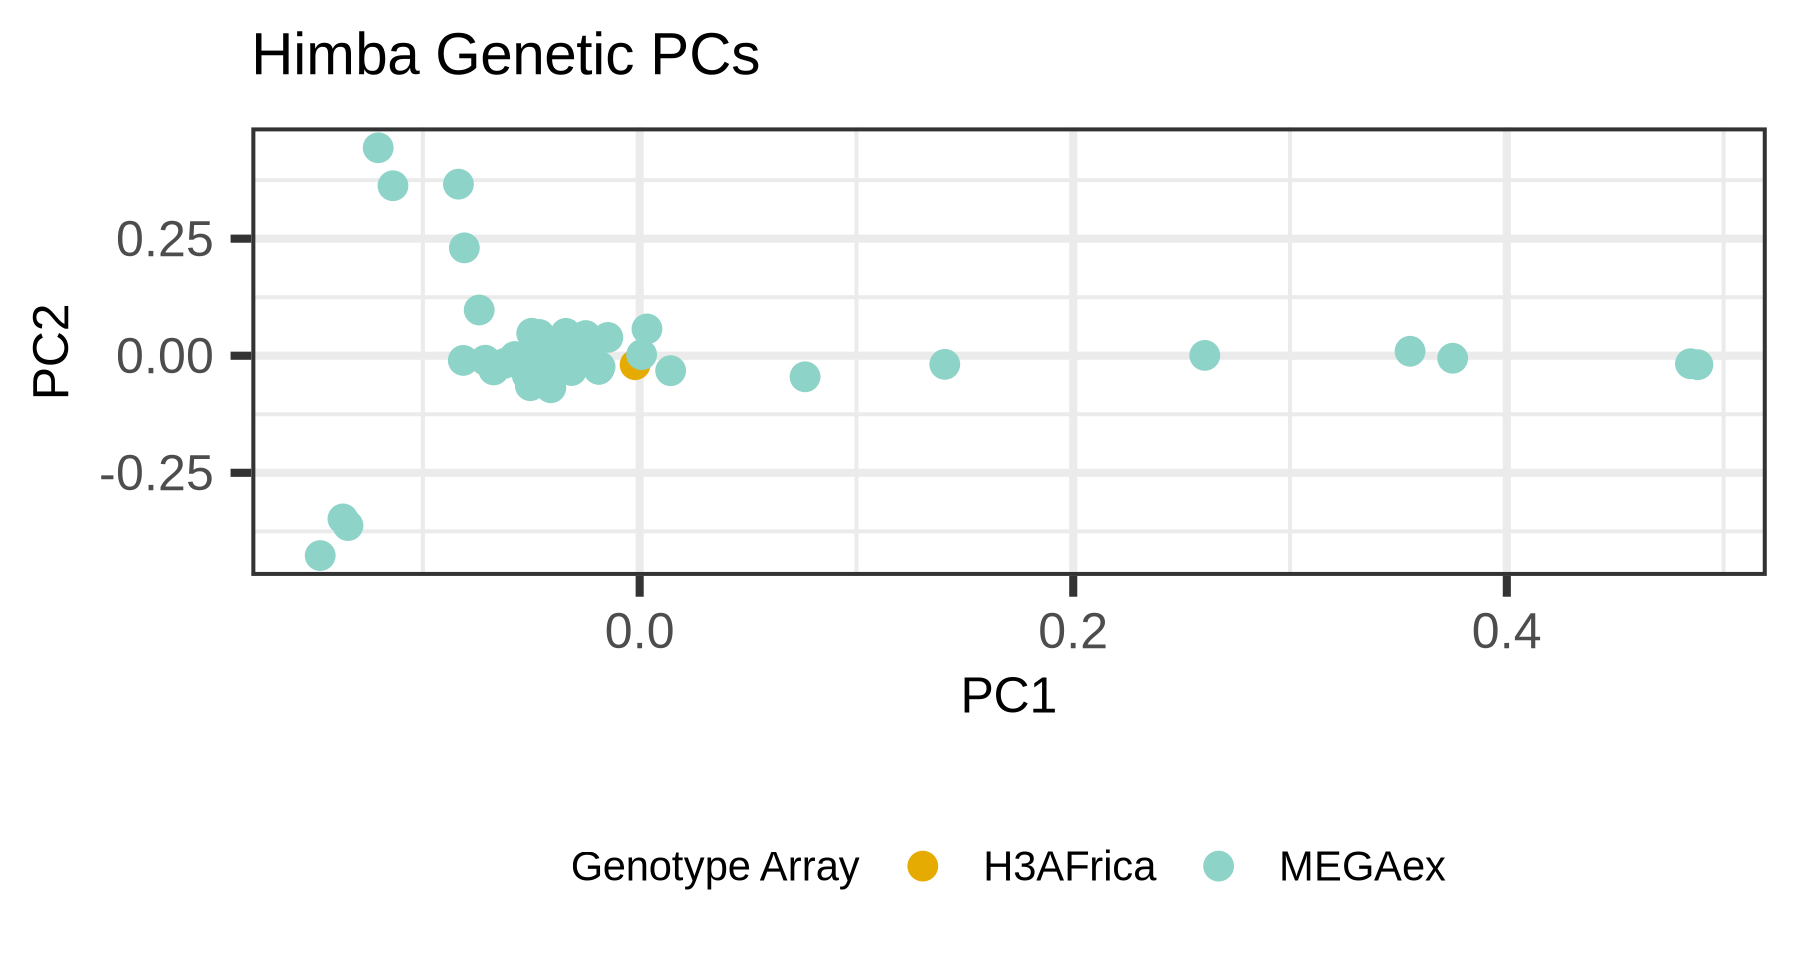

In [116]:
Himba_geno_PCs <- read.delim("Himba_ninety_five_segregating_MAF05_LD03_PCs5.eigenvec", sep= " ", header=F)
colnames(Himba_geno_PCs) <- c("famID", "ID", "PC1_geno", "PC2_geno", "PC3_geno", "PC4_geno", "PC5_geno")
Himba_geno_PCs[Himba_geno_PCs$ID=="HMB494",2] <- "HMB494-2"
rownames(Himba_geno_PCs) <- Himba_geno_PCs$ID
rownames(Himba_pheno_merged) <- Himba_pheno_merged$ID
n <- length(unique(Himba_geno_PCs$famID))
qual_col_pals = brewer.pal.info[brewer.pal.info$category == 'qual',]
col_vector = unlist(mapply(brewer.pal, qual_col_pals$maxcolors, rownames(qual_col_pals)))
colors <- sample(col_vector,n)
options(repr.plot.width = 15, repr.plot.height = 8)

Himba_geno_PCs_plot <- ggplot(Himba_geno_PCs, aes(x=PC1_geno,y=PC2_geno, color=famID))+ xlab("PC1")+ ylab("PC2") + scale_color_manual(values = colors) +
  geom_point(size = 8) +  # Plot the points
  xlab("PC1") + 
  ylab("PC2") + 
  scale_color_manual(values = colors, name = "Genotype Array") +  # Set legend title
  theme_bw() + 
  theme_bw(base_size = 50) + 
  theme(
    axis.text = element_text(size = 30),
    axis.title = element_text(size = 30, margin = margin(r = 10)),        
    plot.title = element_text(size = 35), 
    plot.margin = margin(t = 20, r = 20, b = 20, l = 20),
    legend.title = element_text(size = 25),  # Smaller legend title
    legend.text = element_text(size = 25),   # Smaller legend text
    legend.key.size = unit(1, "lines"),      # Smaller legend keys
    legend.position = "bottom"                # Position the legend on the right
  ) + ggtitle("Himba Genetic PCs")


Himba_geno_PCs_plot
#merge in geno PCs
Himba_pheno_merged <- Himba_pheno_merged[Himba_pheno_merged$ID %in% Himba_geno_PCs$ID,]
head(Himba_pheno_merged)
rownames(Himba_pheno_merged) <- Himba_pheno_merged$ID
Himba_pheno_merged <- merge(Himba_pheno_merged, Himba_geno_PCs[,c(1,3,4,5,6,7)], by='row.names', all=TRUE)
rownames(Himba_pheno_merged) <- Himba_pheno_merged$ID
Himba_pheno_merged <- Himba_pheno_merged[,-1]
head(Himba_pheno_merged)
head(Himba_geno_PCs[,c(1,3,4,5,6,7)])



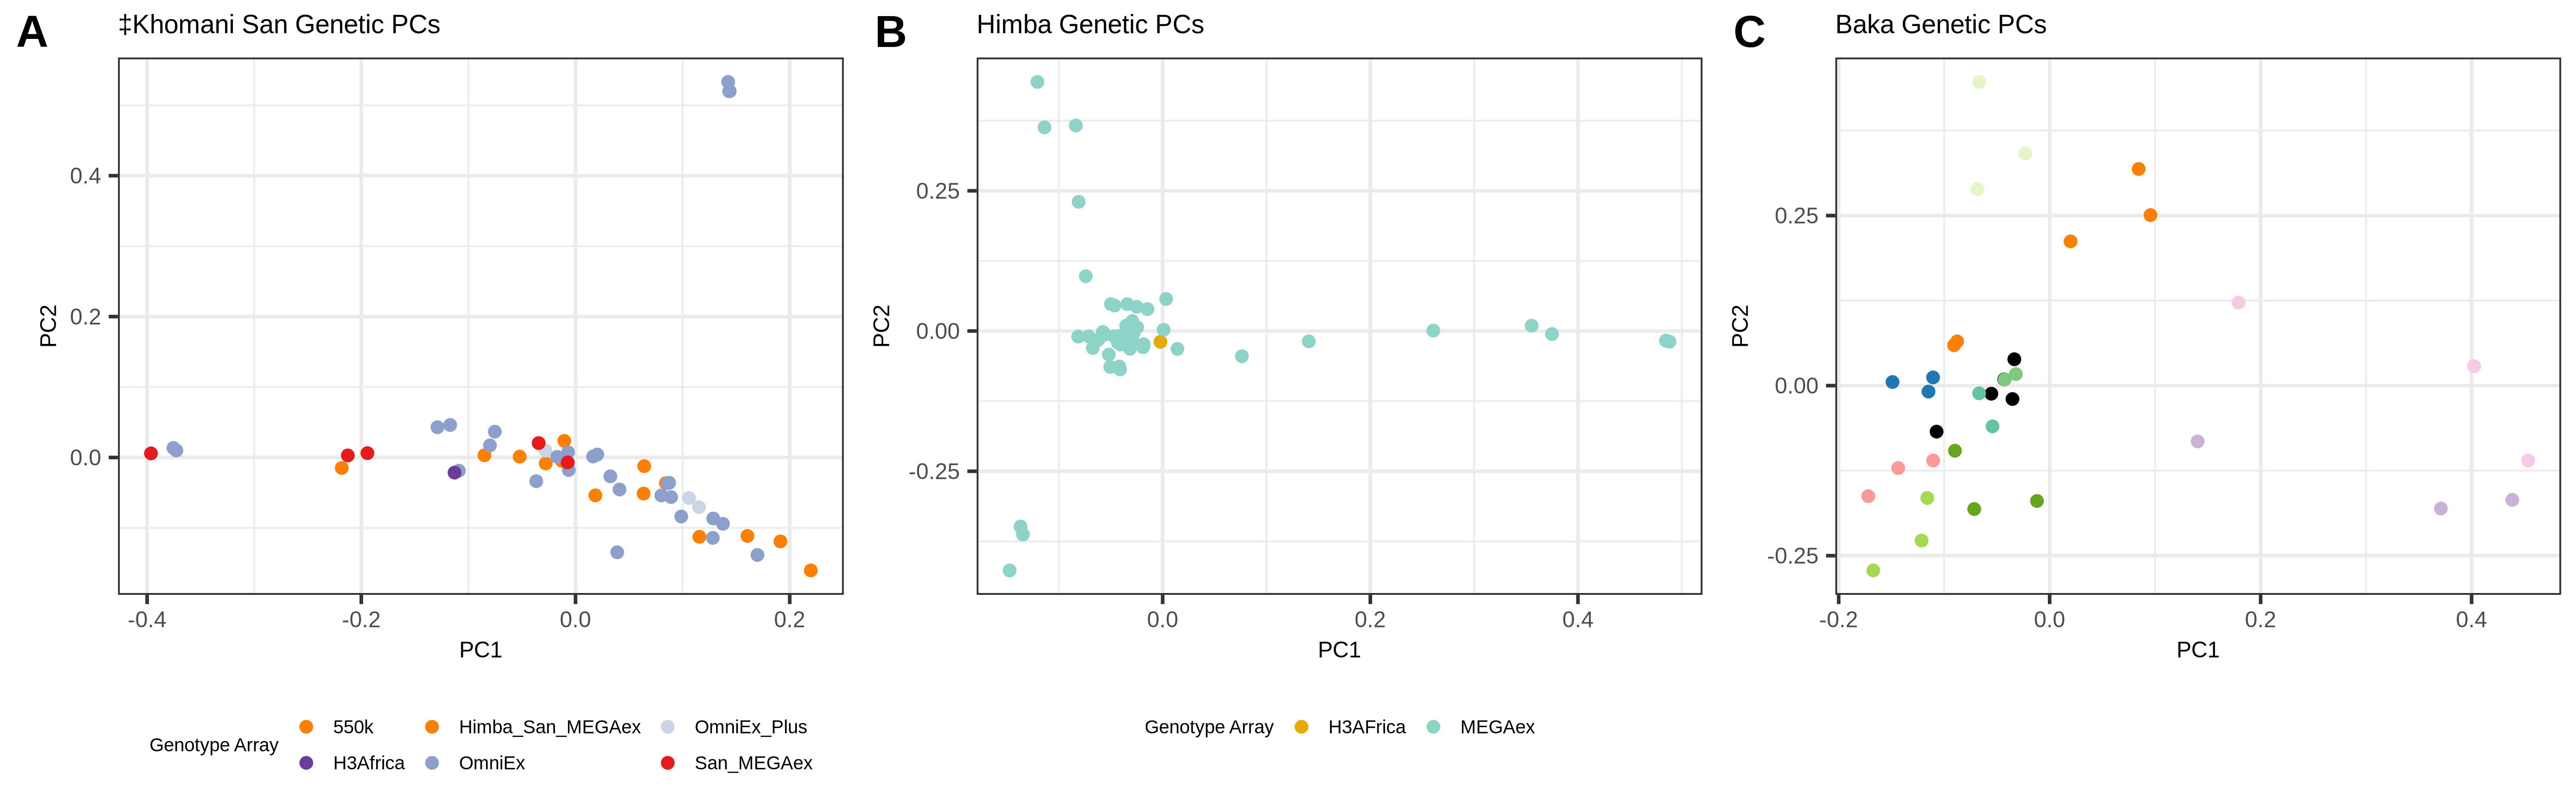

In [124]:
library(cowplot)
options(repr.plot.width = 48 , repr.plot.height = 15)

# plot_grid(plot_grid(KHS_geno_PCs_plot, Himba_geno_PCs_plot, Baka_geno_PCs_plot, rel_widths=c(1,1,1), ncol = 3, labels = c("A", "B", "C"),
#                     label_size = 60), plot_grid(KHS_legend, Himba_legend, ncol=3), nrow=2)

aligned_plots <- align_plots(KHS_geno_PCs_plot, Himba_geno_PCs_plot, Baka_geno_PCs_plot, align = "hv", axis = "tblr")

# Combine and display the aligned plots
plot_grid(aligned_plots[[1]], aligned_plots[[2]], aligned_plots[[3]], nrow = 1, rel_widths=c(1,1,1), ncol = 3, labels = c("A", "B", "C"), label_size=60)

In [ ]:
#Himba Ctrl probe PCs
pca <- prcomp(na.omit(Himba_pheno_merged[,colnames(Himba_pheno_merged)%in% colnames(ctrl_)]))
scores = pca$x
colnames(scores) = paste(colnames(scores), '_cp', sep='')
Himba_pheno_merged <- merge(Himba_pheno_merged, scores[,1:20], by=0, all=TRUE)
rownames(Himba_pheno_merged) <- Himba_pheno_merged[,"ID"]
Himba_pheno_merged <- Himba_pheno_merged[,-1]

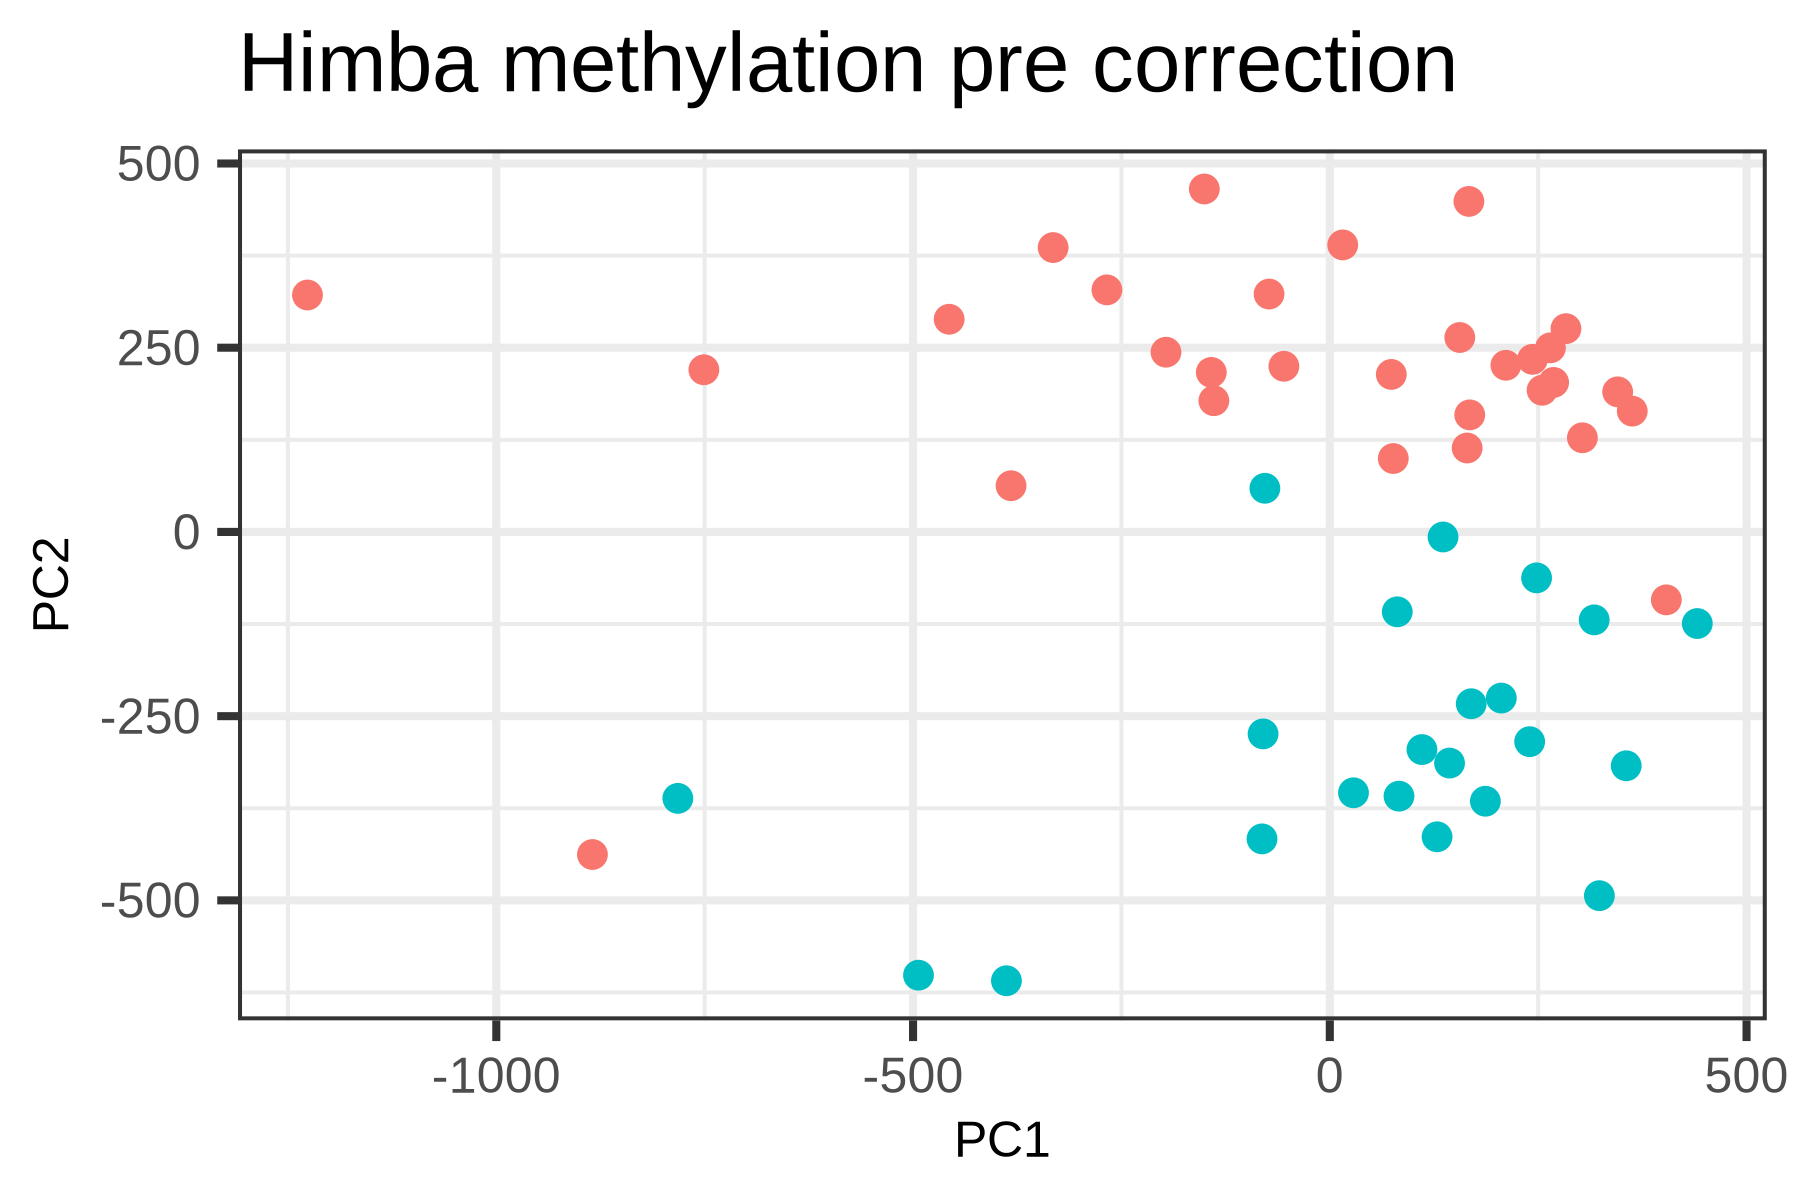

In [205]:
#Himba plot raw methylation PCs
Himba_merged_t <- as.data.frame(t(na.omit(Himba_merged)))
#Himba_merged_t <- Himba_merged_t[,1:test_data]
Himba_merged_t <- Himba_merged_t[rownames(Himba_merged_t) %in% rownames(Himba_pheno_merged),]
Himba_merged_t <- merge(Himba_merged_t, Himba_pheno_merged, by='row.names', all=TRUE)
rownames(Himba_merged_t) <- Himba_merged_t[,"ID"]
Himba_merged_t <- Himba_merged_t[,-1]

for_pc <- Himba_merged_t[,grepl("cg", colnames(Himba_merged_t))]

Himba_pca <- prcomp(for_pc, center=TRUE, scale=TRUE)

# Extract the PCA scores for Himba
pca_scores_himba <- as.data.frame(Himba_pca$x)

# Add metadata to the PCA scores
pca_scores_himba <- cbind(pca_scores_himba, Himba_merged_t)

# Create the PCA plot using ggplot for Himba
pre_ctrl_probe_Himba <- ggplot(pca_scores_himba, aes(x = PC1, y = PC2, color = acc_num)) +
  geom_point(size = 8) +
  xlab("PC1") + 
  ylab("PC2") + 
  theme_bw() + 
  theme_bw(base_size = 50) + 
  theme(
    axis.text = element_text(size = 30),
    axis.title = element_text(size = 30, margin = margin(r = 10)),        
    plot.title = element_text(size = 50), 
    plot.margin = margin(t = 20, r = 20, b = 20, l = 20),
    legend.title = element_text(size = 20),  # Smaller legend title
    legend.text = element_text(size = 15),   # Smaller legend text
    legend.key.size = unit(1, "lines"),      # Smaller legend keys
    legend.position = "none"                # Position the legend on the right
  ) +  ggtitle("Himba methylation pre correction")
options(repr.plot.width = 15, repr.plot.height = 10)

pre_ctrl_probe_Himba 
Himba_pca_scores <- Himba_pca$x
colnames(Himba_pca_scores) = paste(colnames(Himba_pca_scores), '_meth', sep='')

for_pc <- merge(Himba_pca_scores[,1:10], Himba_pheno_merged, by='row.names')
rownames(for_pc) <- for_pc[,"ID"]
for_pc <- for_pc[,-1]
Himba_pheno_merged <- for_pc


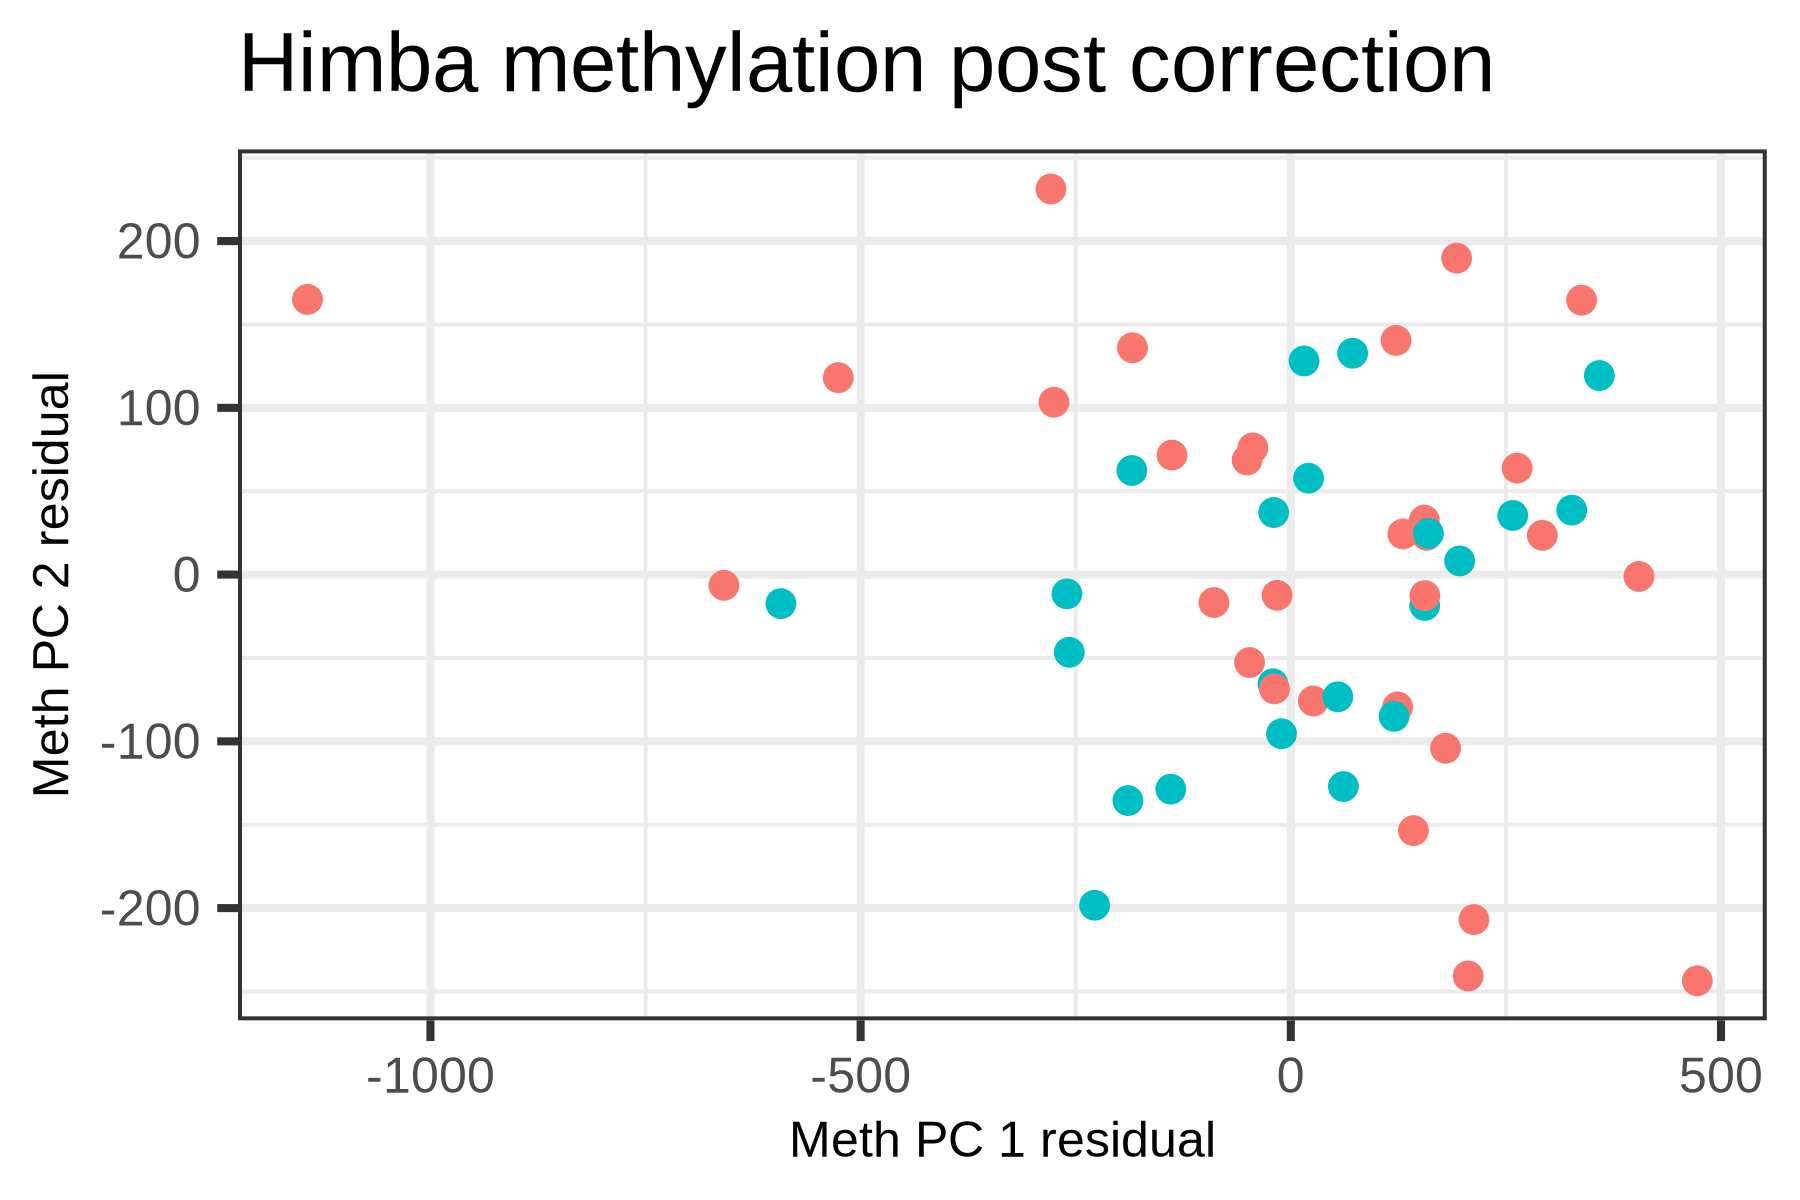

In [206]:
#regress out ctrl probes
pc_regress_1 <- lm(PC1_meth ~ PC1_cp + PC2_cp + PC3_cp + PC4_cp + PC5_cp + PC6_cp + PC7_cp + PC8_cp + PC9_cp + PC10_cp , data=for_pc)
pc_regress_2 <- lm(PC2_meth ~ PC1_cp + PC2_cp + PC3_cp + PC4_cp + PC5_cp + PC6_cp + PC7_cp + PC8_cp + PC9_cp + PC10_cp, data=for_pc)

#tesing random variables doens't eliminate it
#pc_regress_1 <- lm(PC1_meth ~ Neutro, data=for_pc)
#pc_regress_2 <- lm(PC2_meth ~ Neutro, data=for_pc)
pc1_resid <- residuals(pc_regress_1) 
regress_ctr_resid_1 <- as.data.frame(pc1_resid)
pc2_resid <- residuals(pc_regress_2) 
regress_ctr_resid_2 <- as.data.frame(pc2_resid)
resid <- merge(regress_ctr_resid_1,regress_ctr_resid_2, by=0, all=TRUE)
rownames(Himba_pheno_merged) <- Himba_pheno_merged[,"ID"]
rownames(resid) <- resid[,1]
resid <- resid[,-1]
resid <- merge(resid, for_pc, by=0, all=TRUE)
rownames(resid) <- resid[,1]
post_ctrl_probe_Himba <- ggplot(resid, aes(x=pc1_resid , y=residuals(pc_regress_2), color=acc_num, label=rownames(resid))) + #geom_text(size=5, vjust="inward",hjust="inward") +
  theme_bw() + 
  theme_bw(base_size = 50) + 
  theme(
    axis.text = element_text(size = 30),
    axis.title = element_text(size = 30, margin = margin(r = 10)),        
    plot.title = element_text(size = 50), 
    plot.margin = margin(t = 20, r = 20, b = 20, l = 20),
    legend.title = element_text(size = 20),  # Smaller legend title
    legend.text = element_text(size = 15),   # Smaller legend text
    legend.key.size = unit(1, "lines"),      # Smaller legend keys
    legend.position = "none"                # Position the legend on the right
  ) + geom_point(size=8) + xlab("Meth PC 1 residual") +  # Change the x-axis label
  ylab("Meth PC 2 residual") + ggtitle("Himba methylation post correction")
post_ctrl_probe_Himba 

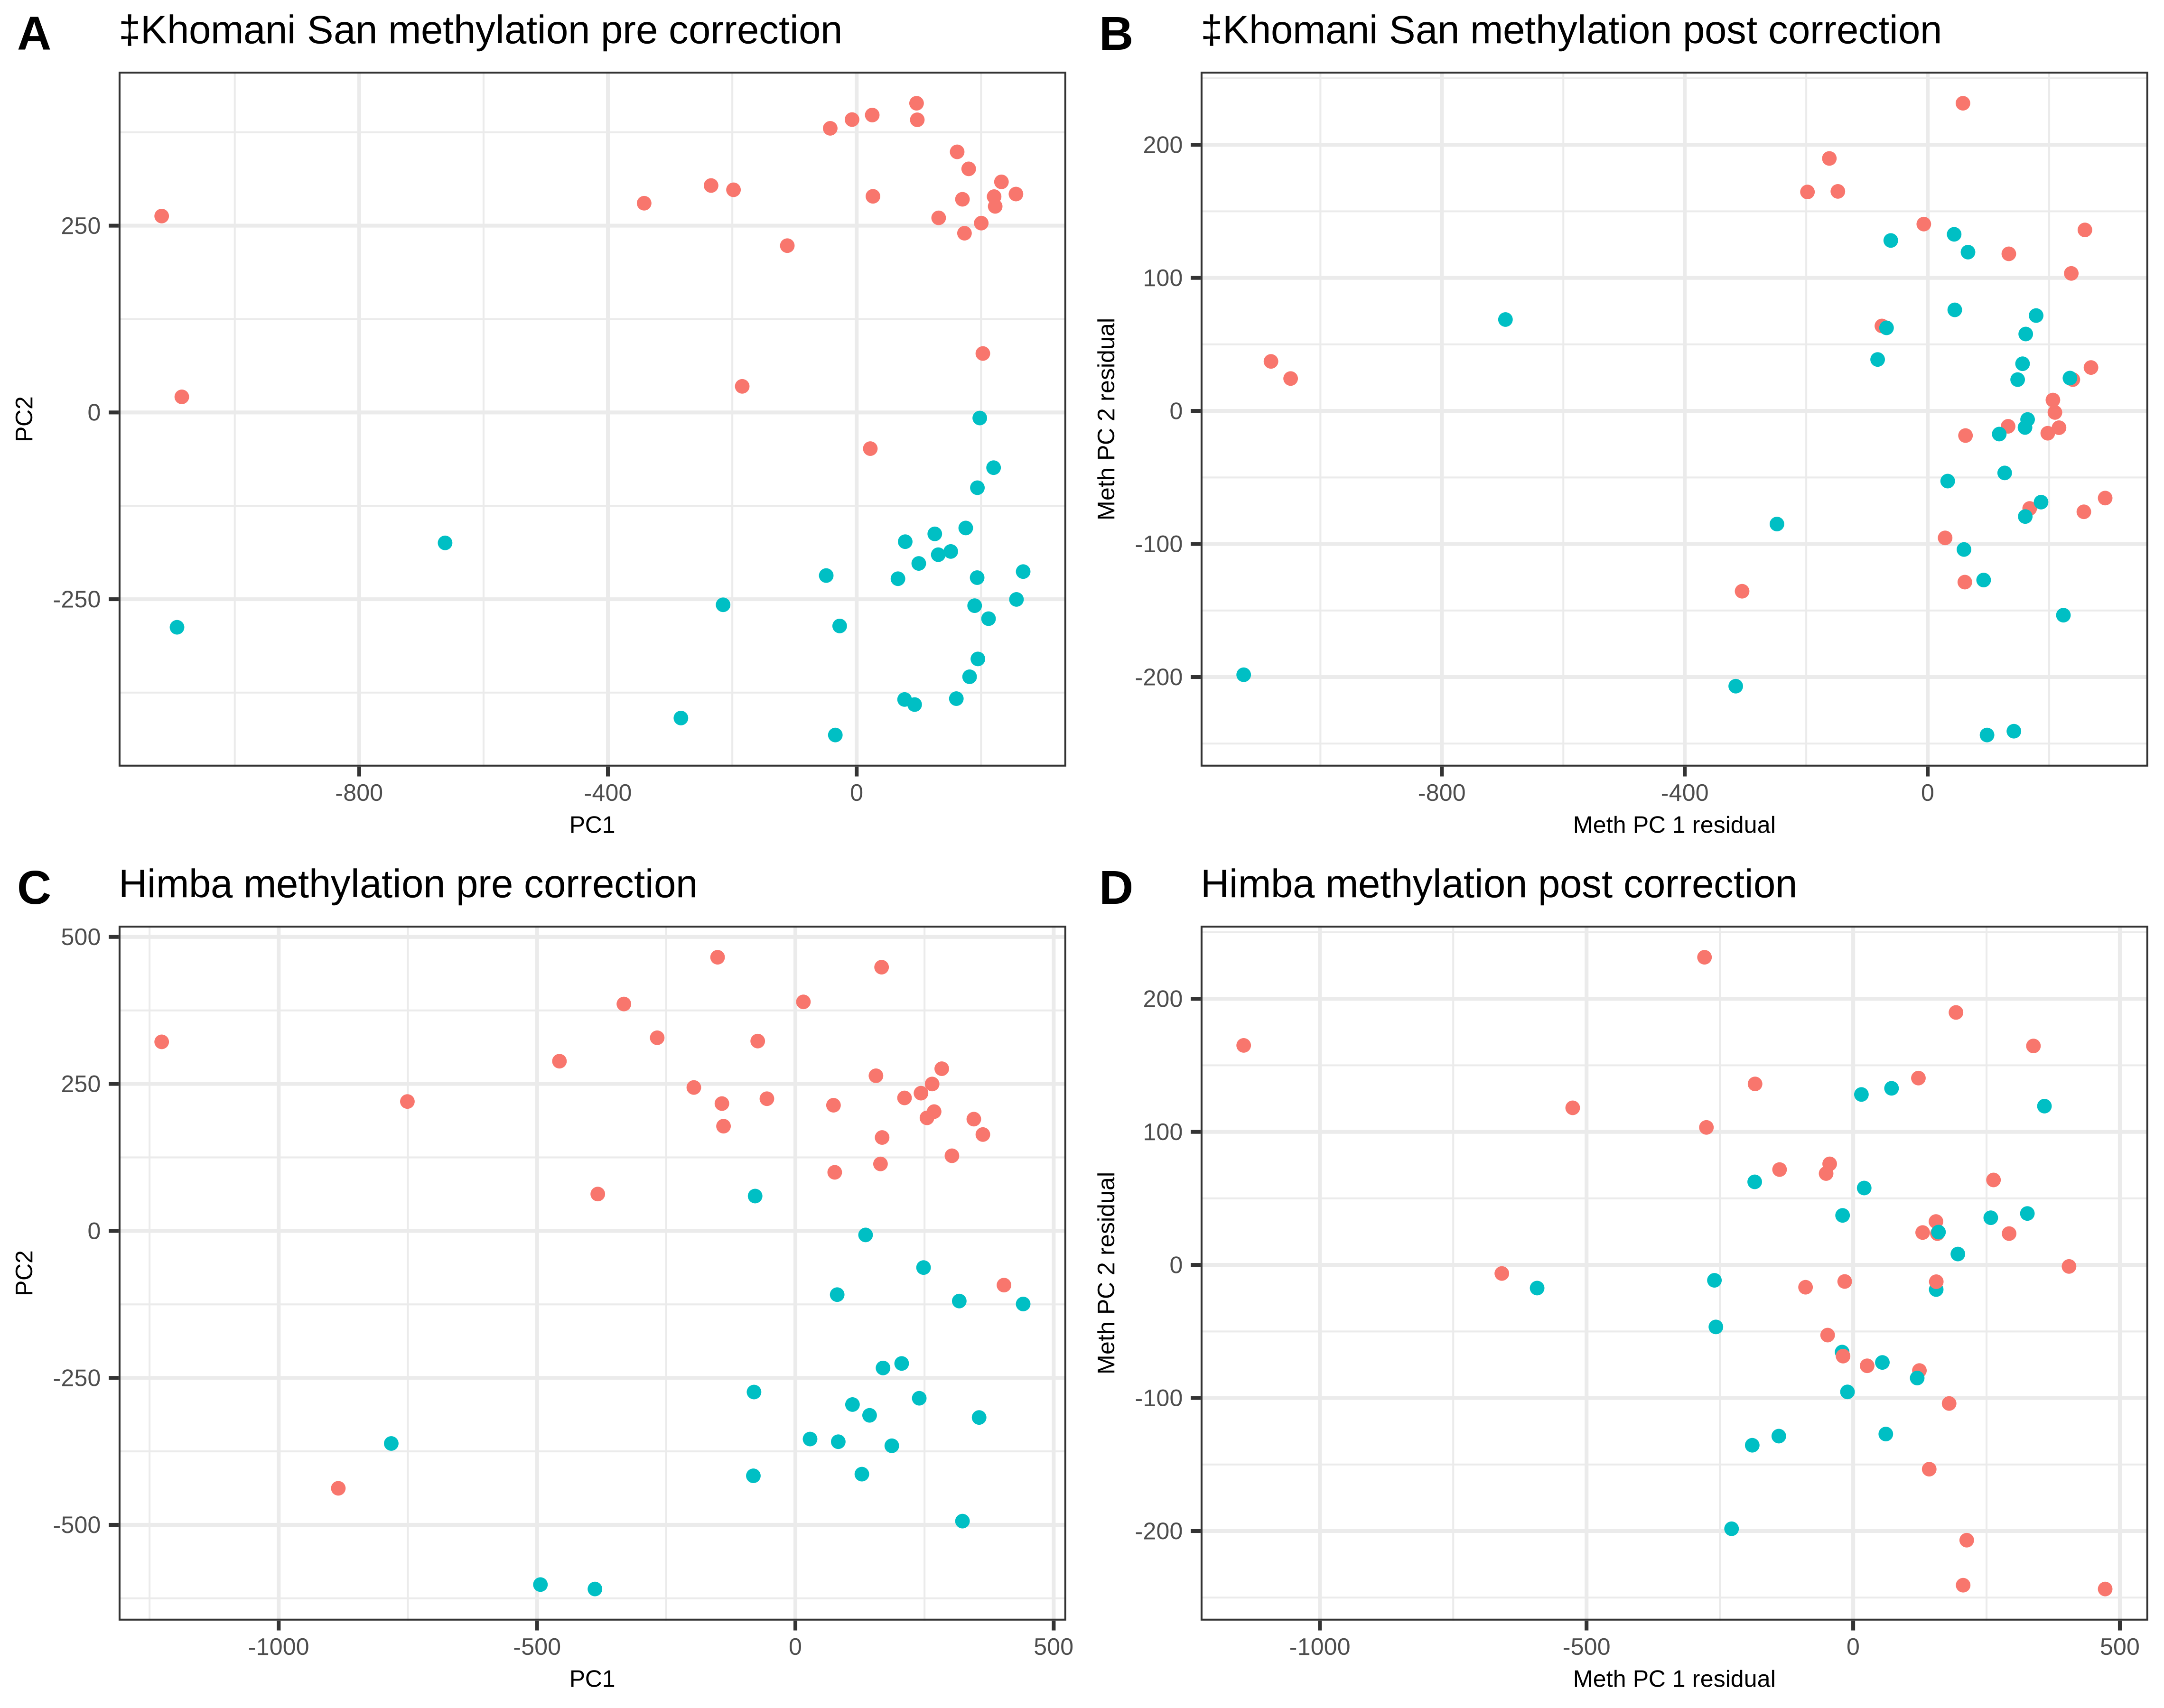

In [207]:
##plot_grid for ctrl probe regress
options(repr.plot.width = 38, repr.plot.height = 30)

plot_grid(pre_ctrl_probe_KHS, post_ctrl_probe_KHS, pre_ctrl_probe_Himba, post_ctrl_probe_Himba, ncol = 2, nrow =2, labels = c("A", "B", "C", "D"),
                    label_size = 60) 

In [208]:
# #Reference Free cell-type deconvolution ##in case I ever what to try that again
# library(TOAST)
# refinx <- findRefinx(Dat, nmarker=10000)
# Y <- Dat[refinx,]
# K <- 2
# outT <- myRefFreeCellMix(Y, mu0=myRefFreeCellMixInitialize(Y, K=K))
# estProp_RF <- outT$Omega

# #merge in control probe PCs and ref-free cell-types
# colnames(estProp_RF) <- c("cell_type1", "cell_type2")

######negative relationships b/w age and Epi except not really in KHS
# plot(Himba_pheno_merged$Neutro, Himba_pheno_merged$age,)
# plot(Himba_pheno_merged$Epi, Himba_pheno_merged$age,)
# cor(Himba_pheno_merged$Epi, Himba_pheno_merged$age,)
# plot(Himba_pheno_merged$Fib, Himba_pheno_merged$age,)

# plot(KHS_pheno_merged$Neutro, KHS_pheno_merged$age,)
# plot(KHS_pheno_merged$Epi, KHS_pheno_merged$age,)
# cor(KHS_pheno_merged$Epi, KHS_pheno_merged$age,)
# plot(KHS_pheno_merged$Fib, KHS_pheno_merged$age,)

# plot(Baka_pheno$Neutro, Baka_pheno$age,)
# plot(Baka_pheno$Epi, Baka_pheno$age,)
# cor(Baka_pheno$Epi, Baka_pheno$age,)
# plot(Baka_pheno$Fib, Baka_pheno$age,)


In [105]:
#merge in Baka admixture proportions
load("/share/hennlab/vault/people/shyamie/methylation/results/methylation_age.RData")
ls()
head(variables.baka)
rownames(variables.baka) <- variables.baka$IID
Baka_pheno <- merge(Baka_pheno, variables.baka[,6:9], by='row.names')
colnames(Baka_pheno)
rownames(Baka_pheno) <- Baka_pheno$IID
Baka_pheno <- Baka_pheno[,-1]
head(Baka_pheno)
variables.ks[variables.ks$IID %in% c("SA1000", "SA0682", "SA0882"),]
summary(variables.ks$San)
summary(variables.ks$Bantu)

[1] "age.estimates"                   "ARRAY"                          
 [3] "bad.probes"                      "bad.samples"                    
 [5] "Baka"                            "Baka_geno_PCs"                  
 [7] "Baka_geno_PCs_plot"              "Baka_KS1"                       
 [9] "Baka_pca"                        "Baka_pca_scores"                
[11] "Baka_pheno"                      "Baka_t"                         
[13] "BakaKS_batch1_pheno"             "BakaKS_ctrl_"                   
[15] "BATCH"                           "beta.baka.blood"                
[17] "beta.matrix.baka"                "beta.matrix.ks"                 
[19] "bh.p.thresholds"                 "centBloodSub.m"                 
[21] "centEpiFibIC.m"                  "col_vector"                     
[23] "colors"                          "common_cols"                    
[25] "ctrl_"                           "Dat"                            
[27] "Dat.funnorm.waNorm.dpvalsMasked" "Dat.sample.probesQCed"          
[29] "Dat.ssnnorm.waNorm.dpvalsMasked" "fail.CpGs"                      
[31] "for_pc"                          "frac.m"                         
[33] "full.probe.info"                 "Himba_geno_PCs"                 
[35] "Himba_geno_PCs_plot"             "Himba_merged"                   
[37] "Himba_merged_t"                  "Himba_pca"                      
[39] "Himba_pca_scores"                "Himba_pheno_merged"             
[41] "Himba1"                          "Himba1_pheno"                   
[43] "Himba2"                          "Himba2_pheno"                   
[45] "icc"                             "ind.id"                         
[47] "KHS_geno_PCs"                    "KHS_geno_PCs_plot"              
[49] "KHS_merged"                      "KHS_merged_t"                   
[51] "KHS_pca"                         "KHS_pca_scores"                 
[53] "KHS_pheno_merged"                "KHS1"                           
[55] "KHS1_pheno"                      "KHS2"                           
[57] "KHS2_pheno"                      "MAF05_SNP_baka.probes"          
[59] "MAF05_SNP_himba.probes"          "MAF05_SNP_KHS.probes"           
[61] "n"                               "pc_regress_1"                   
[63] "pc_regress_2"                    "pc1_resid"                      
[65] "pc2_resid"                       "pca"                            
[67] "pca_scores"                      "pca_scores_himba"               
[69] "pca.scores.blood"                "pca.scores.saliva"              
[71] "pheno.new"                       "post_ctrl_probe_Himba"          
[73] "post_ctrl_probe_KHS"             "pre_ctrl_probe_Himba"           
[75] "pre_ctrl_probe_KHS"              "probe.info"                     
[77] "pval.thresh"                     "qual_col_pals"                  
[79] "regress_ctr_resid_1"             "regress_ctr_resid_2"            
[81] "resid"                           "scores"                         
[83] "test_data"                       "test.baka"                      
[85] "test.emmax.baka.blood"           "test.emmax.ks"                  
[87] "variables.baka"                  "variables.baka.blood"           
[89] "variables.ks"                    "withinArrayNorm"

,FID,IID,age,sex,batch,European,Baka,San,Bantu,mean.beta
,<fct>,<chr>,<int>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,Baka_Cam_B20,B20H,29,M,1,0.022456,0.861391,0.026753,0.089400,0.5102902
2,Baka_Cam_B20,B20F,23,F,1,0.019782,0.884084,0.010662,0.085472,0.5078363
3,Baka_Cam_B22,B22H,48,M,1,0.009881,0.964434,0.000010,0.025675,0.5093672
4,Baka_Cam_B22,B22F,32,F,1,0.011086,0.962073,0.007254,0.019587,0.5109198
5,Baka_Cam_B01,B01E,43,F,1,0.012757,0.879648,0.007683,0.099912,0.5085056
6,Baka_Cam_B04,B04E,18,F,1,0.018447,0.855187,0.020959,0.105407,0.5077965


[1] "Row.names"                 "PC1_meth"                 
  [3] "PC2_meth"                  "PC3_meth"                 
  [5] "PC4_meth"                  "PC5_meth"                 
  [7] "PC6_meth"                  "PC7_meth"                 
  [9] "PC8_meth"                  "PC9_meth"                 
 [11] "PC10_meth"                 "IID"                      
 [13] "age"                       "sex"                      
 [15] "ethnicity"                 "tissue"                   
 [17] "disease_state"             "group"                    
 [19] "acc_num"                   "predictedSex"             
 [21] "medianMeth"                "medianUnmeth"             
 [23] "predictedAge"              "predictedAgeNoNorm"       
 [25] "BISULFITE CONVERSION I"    "BISULFITE CONVERSION I.1" 
 [27] "BISULFITE CONVERSION I.2"  "BISULFITE CONVERSION I.3" 
 [29] "BISULFITE CONVERSION I.4"  "BISULFITE CONVERSION I.5" 
 [31] "BISULFITE CONVERSION I.6"  "BISULFITE CONVERSION I.7" 
 [33] "BISULFITE CONVERSION I.8"  "BISULFITE CONVERSION I.9" 
 [35] "BISULFITE CONVERSION I.10" "BISULFITE CONVERSION I.11"
 [37] "BISULFITE CONVERSION II"   "BISULFITE CONVERSION II.1"
 [39] "BISULFITE CONVERSION II.2" "BISULFITE CONVERSION II.3"
 [41] "EXTENSION"                 "EXTENSION.1"              
 [43] "EXTENSION.2"               "EXTENSION.3"              
 [45] "HYBRIDIZATION"             "HYBRIDIZATION.1"          
 [47] "HYBRIDIZATION.2"           "NON-POLYMORPHIC"          
 [49] "NON-POLYMORPHIC.1"         "NON-POLYMORPHIC.2"        
 [51] "NON-POLYMORPHIC.3"         "NORM_A"                   
 [53] "NORM_A.1"                  "NORM_A.2"                 
 [55] "NORM_A.3"                  "NORM_A.4"                 
 [57] "NORM_A.5"                  "NORM_A.6"                 
 [59] "NORM_A.7"                  "NORM_A.8"                 
 [61] "NORM_A.9"                  "NORM_A.10"                
 [63] "NORM_A.11"                 "NORM_A.12"                
 [65] "NORM_A.13"                 "NORM_A.14"                
 [67] "NORM_A.15"                 "NORM_A.16"                
 [69] "NORM_A.17"                 "NORM_A.18"                
 [71] "NORM_A.19"                 "NORM_A.20"                
 [73] "NORM_A.21"                 "NORM_A.22"                
 [75] "NORM_A.23"                 "NORM_A.24"                
 [77] "NORM_A.25"                 "NORM_A.26"                
 [79] "NORM_A.27"                 "NORM_A.28"                
 [81] "NORM_A.29"                 "NORM_A.30"                
 [83] "NORM_A.31"                 "NORM_C"                   
 [85] "NORM_C.1"                  "NORM_C.2"                 
 [87] "NORM_C.3"                  "NORM_C.4"                 
 [89] "NORM_C.5"                  "NORM_C.6"                 
 [91] "NORM_C.7"                  "NORM_C.8"                 
 [93] "NORM_C.9"                  "NORM_C.10"                
 [95] "NORM_C.11"                 "NORM_C.12"                
 [97] "NORM_C.13"                 "NORM_C.14"                
 [99] "NORM_C.15"                 "NORM_C.16"                
[101] "NORM_C.17"                 "NORM_C.18"                
[103] "NORM_C.19"                 "NORM_C.20"                
[105] "NORM_C.21"                 "NORM_C.22"                
[107] "NORM_C.23"                 "NORM_C.24"                
[109] "NORM_C.25"                 "NORM_C.26"                
[111] "NORM_C.27"                 "NORM_C.28"                
[113] "NORM_C.29"                 "NORM_C.30"                
[115] "NORM_C.31"                 "NORM_C.32"                
[117] "NORM_C.33"                 "NORM_C.34"                
[119] "NORM_C.35"                 "NORM_C.36"                
[121] "NORM_C.37"                 "NORM_C.38"                
[123] "NORM_C.39"                 "NORM_C.40"                
[125] "NORM_C.41"                 "NORM_C.42"                
[127] "NORM_C.43"                 "NORM_C.44"                
[129] "NORM_C.45"                 

,PC1_meth,PC2_meth,PC3_meth,PC4_meth,PC5_meth,PC6_meth,PC7_meth,PC8_meth,PC9_meth,PC10_meth,...,PC15_cp,PC16_cp,PC17_cp,PC18_cp,PC19_cp,PC20_cp,European,Baka,San,Bantu
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
B01E,-339.78592,399.4844,97.505556,-405.28825,143.202172,-383.60610,171.386781,-24.180540,149.3727689,-78.38686,...,-585.3309,-205.8693,-255.9039,247.91309,92.11578,161.7962,0.012757,0.879648,0.007683,0.099912
B03E,-98.68215,-199.4975,-17.735321,-34.69971,69.561864,40.95017,-8.847813,-40.520665,27.5862013,-113.11813,...,-387.5099,422.6813,1385.2174,-204.59755,381.96148,308.6813,0.000425,0.999555,0.000010,0.000010
B03F,68.68628,-110.4971,-145.813415,-94.62155,-121.254053,80.76979,39.580865,-43.778261,-112.2813491,-277.68178,...,-765.5797,-912.8079,167.9719,502.81738,-437.21156,120.9085,0.010451,0.980617,0.007852,0.001080
B03H,-122.67769,121.3865,-7.273185,-113.89463,19.875139,378.90718,-27.218387,128.733000,377.5410931,-165.83582,...,154.1331,921.7908,-372.3828,150.01591,706.32187,-104.4538,0.013931,0.924962,0.002764,0.058343
B04E,-247.52786,-300.5129,107.035332,-71.83733,-4.989733,18.64668,-65.214984,8.010675,8.4227841,55.28008,...,-176.3941,509.6207,-346.5390,223.55824,95.28671,-186.9348,0.018447,0.855187,0.020959,0.105407
B05E,-79.17765,-253.0483,185.641552,58.64427,22.908105,-59.18116,-86.570864,96.351613,-0.0883629,-20.29374,...,-256.0268,-1543.0782,809.1845,-71.69433,347.48068,-147.0410,0.003841,0.996139,0.000010,0.000010


,IID,age,batch,sex,height,European,Baka,San,Bantu,M.R.Arm,E.R.Arm,M.L.Arm,E.L.Arm,M.Wrist,E.Wrist,M.Arm.Avg,M.Arm.Diff,mean.beta
,<chr>,<int>,<int>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
39,SA1000,85,2,F,137.4,0.037216,1e-05,0.789269,0.173505,74.80333,15.02667,75.46,15.97667,95.62,19.36,75.13167,0.7,0.4949068


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
 0.3801  0.6259  0.7898  0.7539  0.8615  1.0000       8 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
0.00001 0.02425 0.08786 0.10817 0.15868 0.43175       8 

In [106]:
#change to factors#

Baka_pheno$group <- as.factor(Baka_pheno$group)
Baka_pheno[which(Baka_pheno$sex == "F"),"sex"] <- 1 
Baka_pheno[which(Baka_pheno$sex == "M"),"sex"] <- 2 
Baka_pheno[which(Baka_pheno$acc_num == "batch1"),"acc_num"] <- 1 
Baka_pheno[which(Baka_pheno$acc_num == "batch2"),"acc_num"] <- 2 

Himba_pheno_merged[which(Himba_pheno_merged$sex == "F"),"sex"] <- 1 
Himba_pheno_merged[which(Himba_pheno_merged$sex == "M"),"sex"] <- 2 
Himba_pheno_merged[which(Himba_pheno_merged$acc_num == "Batch 1"),"acc_num"] <- 1 
Himba_pheno_merged[which(Himba_pheno_merged$acc_num == "Batch 2"),"acc_num"] <- 2 


KHS_pheno_merged[which(KHS_pheno_merged$sex == "F"),"sex"] <- 1 
KHS_pheno_merged[which(KHS_pheno_merged$sex == "M"),"sex"] <- 2 
KHS_pheno_merged[which(KHS_pheno_merged$acc_num == "batch1"),"acc_num"] <- 1 
KHS_pheno_merged[which(KHS_pheno_merged$acc_num == "batch2"),"acc_num"] <- 2 

Baka_pheno$sex <- as.factor(Baka_pheno$sex)
KHS_pheno_merged$sex <- as.factor(KHS_pheno_merged$sex)
Himba_pheno_merged$sex <- as.factor(Himba_pheno_merged$sex)


head(Baka_pheno[,10:20])
head(KHS_pheno_merged[,10:20])
head(Himba_pheno_merged[,10:20])


,PC10_meth,IID,age,sex,ethnicity,tissue,disease_state,group,acc_num,predictedSex,medianMeth
,<dbl>,<chr>,<int>,<fct>,<chr>,<chr>,<chr>,<fct>,<chr>,<chr>,<dbl>
B01E,-78.38686,B01E,43,1,Baka,saliva,healthy,B01,1,F,11.46276
B03E,-113.11813,B03E,9,1,Baka,saliva,healthy,B03,1,F,12.19245
B03F,-277.68178,B03F,39,1,Baka,saliva,healthy,B03,1,F,12.10148
B03H,-165.83582,B03H,40,2,Baka,saliva,healthy,B03,1,M,11.52967
B04E,55.28008,B04E,18,1,Baka,saliva,healthy,B04,1,F,11.81398
B05E,-20.29374,B05E,5,1,Baka,saliva,healthy,B05,1,F,12.22445


,PC10_meth,IID,age,sex,ethnicity,tissue,disease_state,group,acc_num,predictedSex,medianMeth
,<dbl>,<chr>,<int>,<fct>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>
SA003,80.647302,SA003,22,2,Khomani_San,saliva,healthy,NA,1,M,12.38681
SA004,13.795783,SA004,75,2,Khomani_San,saliva,healthy,NA,1,M,12.22355
SA009,107.275359,SA009,67,1,Khomani_San,saliva,healthy,NA,1,F,12.09259
SA010,28.627565,SA010,21,1,Khomani_San,saliva,healthy,NA,1,F,11.90332
SA017,-8.647839,SA017,65,1,Khomani_San,saliva,healthy,NA,1,F,11.95946
SA018,-50.750244,SA018,56,1,Khomani_San,saliva,healthy,NA,1,F,12.28670


,PC10_meth,ID,age,sex,Array,Slide,mMed,uMed,predictedSex,predictedAge,BS Conversion I-C1
,<dbl>,<chr>,<dbl>,<fct>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>
HMB008,104.046737,HMB008,66,1,R01C01,202292330031,12.14466,11.50829,F,70.775468,10189
HMB009,7.608086,HMB009,31,1,R02C01,202292330031,12.42443,11.74231,F,34.808527,11637
HMB013,-21.758358,HMB013,13,2,R01C01,203841950142,12.58191,11.82575,M,4.806445,13335
HMB014,36.966634,HMB014,34,2,R02C01,203841950142,12.28511,11.59852,M,46.390716,12718
HMB015,-10.103443,HMB015,20,1,R03C01,202292330031,12.47776,11.81858,F,24.169112,12265
HMB017,-15.566166,HMB017,17,1,R04C01,202292330031,12.69022,11.89140,F,19.230937,14373


In [107]:
#save pheno, transposed_na_omit_no_repeat, and non_transposed with NA (and the non_geno KHS)
#kept the HMB181 years apart repeats in the Himba
#should take out ctrl probes by ! grepl("cg") and some ch probes that escaped, fixed this!
nrow(Baka)
baka_ch <- rownames(Baka[!grepl("cg", rownames(Baka)),])
Baka <- Baka[grepl("cg", rownames(Baka)),]
nrow(Baka)

nrow(KHS_merged)
KHS_ch <- rownames(KHS_merged[!grepl("cg", rownames(KHS_merged)),])
KHS_merged <- KHS_merged[grepl("cg", rownames(KHS_merged)),]
nrow(KHS_merged)

nrow(Himba_merged)
Himba_merged <- Himba_merged[grepl("cg", rownames(Himba_merged)),]
nrow(Himba_merged)


[1] 400893

[1] 400893

[1] 418629

[1] 418629

[1] 713988

[1] 713988

In [108]:
#filter out individaul ctrl probe from pheno
ctrl_probes <- c(colnames(ctrl_), c(BakaKS_ctrl_))
Baka_pheno <- Baka_pheno[,!colnames(Baka_pheno)%in% ctrl_probes]
KHS_pheno_merged <- KHS_pheno_merged[,!colnames(KHS_pheno_merged)%in% ctrl_probes]
Himba_pheno_merged <- Himba_pheno_merged[,!colnames(Himba_pheno_merged)%in% ctrl_probes]

#check everything
head(Baka)
head(Baka_pheno[,10:20])
nrow(Baka_pheno)
ncol(Baka)
nrow(Baka)
colnames(Baka_pheno)

head(KHS_merged)
head(KHS_pheno_merged)
nrow(KHS_pheno_merged)
ncol(KHS_merged)
nrow(KHS_merged)
colnames(KHS_pheno_merged)

head(Himba_merged)
head(Himba_pheno_merged)
nrow(Himba_pheno_merged)
ncol(Himba_merged)
nrow(Himba_merged)
colnames(Himba_pheno_merged)
setwd("/share/hennlab/users/glmeeks/age_methylation/methylation_norm_EWAS")

#save(list=c("KHS_merged_t", "KHS_merged", "KHS_pheno_merged", "Baka", "Baka_t", "Baka_pheno", "Himba_merged", "Himba_pheno_merged", "Himba_merged_t", "MAF05_SNP_himba.probes", "MAF05_SNP_baka.probes", "MAF05_SNP_KHS.probes"), file="Diverse_Age_QC_methylation_phenos.RData")


,B22F,B03F,B20H,B22H,B05H,B06E,B09F,B03H,B01E,B16H,...,B19E,B20E,B22E,B09E,B16E,B05E,B08E,B23F,B03E,B14F
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
cg00000029,0.4975206,0.4328044,0.4560238,0.4160160,0.4421311,0.4677641,0.4765290,0.3885046,0.4832020,0.4549974,...,0.3332644,0.4210895,0.4909744,0.4696520,0.5510959,0.4797778,0.4324724,0.4415513,0.4570352,0.3907806
cg00000109,0.9043482,0.9135458,0.8746905,0.9103792,0.8857607,0.9261800,0.9004132,0.9108207,0.8828372,0.9064393,...,0.9165040,0.9078897,0.9080458,0.9194092,0.9043066,0.9124975,0.9207741,0.9204473,0.9075636,0.8977806
cg00000165,0.1655845,0.1769483,0.2892441,0.1746836,0.2304356,0.1683756,0.1631328,0.1620065,0.3001870,0.1651773,...,0.1630116,0.2195903,0.1676016,0.1799878,0.2006546,0.1561042,0.1571382,0.1820999,0.1826223,0.1910933
cg00000236,0.7997561,0.7266148,0.7682223,0.7460816,0.7953858,0.7474195,0.7096972,0.7600737,0.8139192,0.7418614,...,0.8367863,0.7946930,0.7397197,0.7845791,0.7794425,0.8092808,0.7317804,0.7633476,0.6814822,0.7413209
cg00000289,0.6920991,0.6947690,0.6700506,0.7044534,0.6338345,0.6768790,0.6743670,0.7190972,0.6261477,0.6648760,...,0.6943106,0.6520281,0.6977052,0.7050113,0.6438521,0.7047187,0.6807473,0.7010634,0.7193786,0.6991786
cg00000321,0.2875754,0.4336620,0.3652042,0.2684709,0.3282480,0.2577379,0.2590284,0.4659150,0.1797559,0.2907974,...,0.3089244,0.2619590,0.2486956,0.2521832,0.2470693,0.2834120,0.3019813,0.3563329,0.3680417,0.3272287


,PC10_meth,IID,age,sex,ethnicity,tissue,disease_state,group,acc_num,predictedSex,medianMeth
,<dbl>,<chr>,<int>,<fct>,<chr>,<chr>,<chr>,<fct>,<chr>,<chr>,<dbl>
B01E,-78.38686,B01E,43,1,Baka,saliva,healthy,B01,1,F,11.46276
B03E,-113.11813,B03E,9,1,Baka,saliva,healthy,B03,1,F,12.19245
B03F,-277.68178,B03F,39,1,Baka,saliva,healthy,B03,1,F,12.10148
B03H,-165.83582,B03H,40,2,Baka,saliva,healthy,B03,1,M,11.52967
B04E,55.28008,B04E,18,1,Baka,saliva,healthy,B04,1,F,11.81398
B05E,-20.29374,B05E,5,1,Baka,saliva,healthy,B05,1,F,12.22445


[1] 35

[1] 35

[1] 400893

[1] "PC1_meth"           "PC2_meth"           "PC3_meth"          
 [4] "PC4_meth"           "PC5_meth"           "PC6_meth"          
 [7] "PC7_meth"           "PC8_meth"           "PC9_meth"          
[10] "PC10_meth"          "IID"                "age"               
[13] "sex"                "ethnicity"          "tissue"            
[16] "disease_state"      "group"              "acc_num"           
[19] "predictedSex"       "medianMeth"         "medianUnmeth"      
[22] "predictedAge"       "predictedAgeNoNorm" "Epi"               
[25] "Fib"                "B"                  "NK"                
[28] "CD4T"               "CD8T"               "Mono"              
[31] "Neutro"             "Eosino"             "famID"             
[34] "ID"                 "PC1_geno"           "PC2_geno"          
[37] "PC3_geno"           "PC4_geno"           "PC5_geno"          
[40] "PC1_cp"             "PC2_cp"             "PC3_cp"            
[43] "PC4_cp"             "PC5_cp"             "PC6_cp"            
[46] "PC7_cp"             "PC8_cp"             "PC9_cp"            
[49] "PC10_cp"            "PC11_cp"            "PC12_cp"           
[52] "PC13_cp"            "PC14_cp"            "PC15_cp"           
[55] "PC16_cp"            "PC17_cp"            "PC18_cp"           
[58] "PC19_cp"            "PC20_cp"            "European"          
[61] "Baka"               "San"                "Bantu"

,SA009,SA039,SA003,SA029,SA037,SA018,SA061,SA028,SA036,SA046,...,SA1027,SA0862,SA0952,SA1010,SA1028,SA1023,SA1015,SA0642,SA1022,SA1039
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
cg00000029,0.4546348,0.2013662,0.3584975,0.3805884,0.3192105,0.4387539,0.2957449,0.3533127,0.4438341,0.3517016,...,0.2814533,0.5933150,0.4914359,0.5210887,0.3857663,0.3416308,0.4609989,0.4267401,0.4358447,0.3998372
cg00000109,0.9143927,0.8950495,0.9164140,0.9032017,0.9434948,0.9091683,0.9062818,0.9130715,0.9441043,0.9205877,...,0.9166878,0.9239635,0.8977166,0.8888808,0.9145479,0.9122918,0.9147716,0.9184454,0.9008012,0.9047026
cg00000165,0.1762654,0.3634411,0.1714988,0.1446976,0.2081546,0.2167711,0.1820238,0.1375552,0.1404463,0.1945151,...,0.1912163,0.2930388,0.1891007,0.1936050,0.2093085,0.2419402,0.1942462,0.2001650,0.2731252,0.2447265
cg00000236,0.7721335,0.8851447,0.8225870,0.7537146,0.8480566,0.7220267,0.7614646,0.7649125,0.7558281,0.7827898,...,0.7679011,0.7840956,0.6947526,0.6976344,0.7412341,0.7968510,0.7644635,0.7855384,0.7888917,0.8208485
cg00000289,0.6718628,0.5809167,0.6788951,0.6693923,0.6895471,0.5739363,0.6030397,0.6832698,0.7100615,0.7037370,...,0.7614014,0.7197452,0.7784617,0.7357422,0.7086104,0.7140011,0.7561950,0.7738612,0.7563227,0.7634844
cg00000321,0.2854208,0.4481044,0.3655238,0.3947698,0.3196307,0.2329542,0.2375860,0.3149422,0.2640402,0.3133298,...,0.2073484,0.2670374,0.3038462,0.3525838,0.2805132,0.4440263,0.3255767,0.4026268,0.3759054,0.3179735


,PC1_meth,PC2_meth,PC3_meth,PC4_meth,PC5_meth,PC6_meth,PC7_meth,PC8_meth,PC9_meth,PC10_meth,...,PC11_cp,PC12_cp,PC13_cp,PC14_cp,PC15_cp,PC16_cp,PC17_cp,PC18_cp,PC19_cp,PC20_cp
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
SA003,-42.56834,380.30491,129.70750,-97.90563,145.51236,36.28691,-39.591127,49.813903,-66.97860,80.647302,...,736.3519,-377.5176,337.7473,-815.3746,83.67891,-577.3664,807.58689,-517.4857,140.0528,333.7363
SA004,21.87392,-48.41455,34.61652,-226.42052,-85.79862,-156.91107,87.483735,-102.276670,252.98998,13.795783,...,185.2805,351.1085,805.7487,-139.1645,512.93447,-996.6400,166.16417,500.1101,266.9637,-239.6396
SA009,96.26338,413.84887,-112.65607,-125.36851,73.17798,28.13956,90.724428,15.726727,87.21255,107.275359,...,1195.8118,-970.4118,1199.5605,-1003.2171,209.59742,1304.8924,84.91928,346.1969,-163.8890,133.2467
SA010,170.03071,285.34048,36.55066,43.08755,-23.15549,10.92185,-56.762691,-46.043956,-49.57918,28.627565,...,203.4649,216.8499,-702.9083,-1205.0731,-913.87213,-1386.0792,921.61095,142.2664,513.6328,-288.6247
SA017,200.28470,253.40117,-31.30260,82.04960,-87.15845,41.44865,-34.451803,-50.634613,-28.92659,-8.647839,...,-2129.3512,-1525.7547,-1207.3606,236.0626,779.66263,1200.8931,495.77936,-772.9569,354.4317,-80.5453
SA018,161.55513,348.80407,-22.65342,79.75112,-99.33008,32.45202,7.702499,8.343779,-38.66673,-50.750244,...,-736.1897,160.2610,-213.1461,351.9951,-340.89782,-278.7906,-650.15516,-806.7416,517.9926,369.0360


[1] 52

[1] 52

[1] 418629

[1] "PC1_meth"           "PC2_meth"           "PC3_meth"          
 [4] "PC4_meth"           "PC5_meth"           "PC6_meth"          
 [7] "PC7_meth"           "PC8_meth"           "PC9_meth"          
[10] "PC10_meth"          "IID"                "age"               
[13] "sex"                "ethnicity"          "tissue"            
[16] "disease_state"      "group"              "acc_num"           
[19] "predictedSex"       "medianMeth"         "medianUnmeth"      
[22] "predictedAge"       "predictedAgeNoNorm" "Epi"               
[25] "Fib"                "B"                  "NK"                
[28] "CD4T"               "CD8T"               "Mono"              
[31] "Neutro"             "Eosino"             "famID"             
[34] "ID"                 "PC1_geno"           "PC2_geno"          
[37] "PC3_geno"           "PC4_geno"           "PC5_geno"          
[40] "PC1_cp"             "PC2_cp"             "PC3_cp"            
[43] "PC4_cp"             "PC5_cp"             "PC6_cp"            
[46] "PC7_cp"             "PC8_cp"             "PC9_cp"            
[49] "PC10_cp"            "PC11_cp"            "PC12_cp"           
[52] "PC13_cp"            "PC14_cp"            "PC15_cp"           
[55] "PC16_cp"            "PC17_cp"            "PC18_cp"           
[58] "PC19_cp"            "PC20_cp"

,HMB066,HMB069,HMB071,HMB075,HMB078,HMB082,HMB085,HMB087,HMB008,HMB009,...,HMB181_2,HMB182,HMB031,HMB040,HMB051,HMB062,HMB013,HMB014,HMB025,HMB030
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
cg00000029,0.6787353,0.63429309,0.53390907,0.33386493,0.59483684,0.46073399,0.35957289,0.49973921,0.37841547,0.42159572,...,0.61990327,0.59039536,0.38802600,0.46234817,0.58805348,0.35024232,0.48162888,0.29401084,0.46792926,0.47363588
cg00000109,0.9360619,0.93680917,0.94506701,0.92817621,0.94244908,0.93224398,0.93049787,0.93488507,0.93892173,0.93425323,...,0.93114948,0.91949762,0.92863909,0.92484904,0.93251667,0.91487146,0.93137957,0.91363355,0.91745241,0.86396151
cg00000155,0.9774793,0.97592006,0.97695578,0.97746224,0.97478554,0.96901147,0.97450129,0.97510661,0.97611713,0.97818611,...,0.97394179,0.97290006,0.97052241,0.96904217,0.96726274,0.96335577,0.97051939,0.96877854,0.96833796,0.97056608
cg00000158,0.9844444,0.98099578,0.97898847,0.98042780,0.97890798,0.97745810,0.97219023,0.98202974,0.98362508,0.98376009,...,0.97577059,0.97295143,0.97628541,0.97244851,0.97460250,0.97278872,0.98137516,0.97606769,0.97647237,0.97789029
cg00000165,0.0744703,0.05336069,0.04304017,0.05821992,0.04102802,0.04134685,0.05287397,0.05359391,0.05834502,0.05742247,...,0.08740901,0.06016374,0.05324485,0.06549114,0.05826907,0.04551601,0.07069006,0.08305278,0.09052105,0.07576548
cg00000221,0.9307625,0.91322477,0.91937832,0.90516193,0.92734823,0.90850930,0.91114466,0.92396577,0.92637083,0.94461601,...,0.87547033,0.86266716,0.92296480,0.87724256,0.89947505,0.91457090,0.90982972,0.87710724,0.88468137,0.91621151


,PC1_meth,PC2_meth,PC3_meth,PC4_meth,PC5_meth,PC6_meth,PC7_meth,PC8_meth,PC9_meth,PC10_meth,...,PC11_cp,PC12_cp,PC13_cp,PC14_cp,PC15_cp,PC16_cp,PC17_cp,PC18_cp,PC19_cp,PC20_cp
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
HMB008,-72.86452,322.84120,-217.57965,1.0147779,-48.486400,121.49264,-35.03557,19.350640,-208.78030,104.046737,...,796.4272,-867.3880,156.9599,-59.13545,-864.58632,507.09546,-644.3513,776.9297,100.1770,27.27882
HMB009,-150.56210,465.42229,-138.92732,-101.4423046,-62.341958,-70.33855,66.17324,31.806054,-31.74586,7.608086,...,-433.8539,114.5159,-734.4917,108.73286,515.29210,51.53263,648.0036,405.2683,1258.3223,-842.72603
HMB013,-77.90305,59.24378,-12.35143,-288.3402623,183.002290,-323.53071,-86.83094,-120.418007,-83.82547,-21.758358,...,462.3321,752.4595,1550.9404,1480.41819,-11.25645,-966.52577,229.5286,643.7452,205.2956,-290.63420
HMB014,186.65384,-365.47325,54.24867,357.6484949,-74.499218,-104.15524,70.83921,43.349375,-83.85973,36.966634,...,727.1808,1112.2398,941.2244,89.01117,-173.83869,-503.38329,-479.6967,-364.1124,279.6390,797.52262
HMB015,-267.41965,328.49245,-378.60795,-94.4289454,7.499617,-79.69960,-79.00428,-6.991236,65.50363,-10.103443,...,627.4414,753.9921,-169.6119,-521.86908,1070.34784,764.40990,40.0841,172.0383,-127.0688,425.25076
HMB017,15.51572,389.52099,-152.58506,0.6075543,68.430564,-128.27171,-34.68187,-33.895064,-19.59293,-15.566166,...,589.9183,746.6208,-590.6047,-753.76668,1095.09611,-90.34117,-1389.5002,-183.7614,447.8294,540.96146


[1] 52

[1] 52

[1] 713988

[1] "PC1_meth"     "PC2_meth"     "PC3_meth"     "PC4_meth"     "PC5_meth"    
 [6] "PC6_meth"     "PC7_meth"     "PC8_meth"     "PC9_meth"     "PC10_meth"   
[11] "ID"           "age"          "sex"          "Array"        "Slide"       
[16] "mMed"         "uMed"         "predictedSex" "predictedAge" "V31"         
[21] "V32"          "V33"          "V34"          "acc_num"      "Epi"         
[26] "Fib"          "B"            "NK"           "CD4T"         "CD8T"        
[31] "Mono"         "Neutro"       "Eosino"       "famID"        "PC1_geno"    
[36] "PC2_geno"     "PC3_geno"     "PC4_geno"     "PC5_geno"     "PC1_cp"      
[41] "PC2_cp"       "PC3_cp"       "PC4_cp"       "PC5_cp"       "PC6_cp"      
[46] "PC7_cp"       "PC8_cp"       "PC9_cp"       "PC10_cp"      "PC11_cp"     
[51] "PC12_cp"      "PC13_cp"      "PC14_cp"      "PC15_cp"      "PC16_cp"     
[56] "PC17_cp"      "PC18_cp"      "PC19_cp"      "PC20_cp"

In [109]:
##outlier analysis  ##kernel normalization_methylation
setwd("/share/hennlab/users/glmeeks/age_methylation/methylation_norm_EWAS")
options(repr.plot.width=15, repr.plot.height=10)


load("Diverse_Age_QC_methylation_phenos.RData")
library("lumi")
detectOutlier(as.matrix(KHS_merged), ifPlot=TRUE, metric="euclidian")
khs <- detectOutlier(as.matrix(KHS_merged), metric="euclidian")
detectOutlier(as.matrix(Baka), ifPlot=TRUE, metric="euclidian")
detectOutlier(as.matrix(Himba_merged), ifPlot=TRUE, metric="euclidian")


summary(KHS_pheno_merged$age)
summary(Himba_pheno_merged$age)
KHS_pheno_merged[KHS_pheno_merged$ID %in% c("SA1000", "SA039", "SA049", "SA1009", "SA022"), c("age", "sex", "acc_num")]
Himba_pheno_merged[Himba_pheno_merged$ID %in% c("HMB075", "HMB120", "HMB137", "HMB025", "HMB102", "HMB087", "HMB094"), c("age", "sex", "acc_num")]

ERROR: Error in library("lumi"): there is no package called 'lumi'


In [ ]:
khs[khs==TRUE]


In [ ]:
ncol(KHS_merged_t)
ncol(Himba_merged_t)
ncol(Baka_t)

In [ ]:
#load("Diverse_Age_QC_methylation_phenos.RData")
###checking to make sure ctrl probe PCs actually correspond to batch clustering
ggplot(data=Himba_pheno_merged, aes(x=PC1_cp, y=PC2_cp, shape=FALSE, color=acc_num, label=TRUE)) +
theme(panel.grid.major = element_blank(), panel.grid.minor = element_blank(),
panel.background = element_blank(), axis.line = element_line(colour = "black"), legend.position="none",
     text = element_text(size = 20)) + geom_text(aes(label=rownames(Himba_pheno_merged)), size=5)

ggplot(data=KHS_pheno_merged, aes(x=PC1_cp, y=PC2_cp, shape=FALSE, color=acc_num, label=TRUE)) +
theme(panel.grid.major = element_blank(), panel.grid.minor = element_blank(),
panel.background = element_blank(), axis.line = element_line(colour = "black"), legend.position="none",
     text = element_text(size = 20)) + geom_text(aes(label=rownames(KHS_pheno_merged)), size=5)





In [10]:
###checking to make sure ctrl probe PCs actually correlate to meth PCs
load("../Diverse_Age_QC_methylation_phenos.RData")

cor(Himba_pheno_merged$age, Himba_pheno_merged$PC1_meth)
cor(Himba_pheno_merged$age, Himba_pheno_merged$PC2_meth)
cor(Himba_pheno_merged$age, Himba_pheno_merged$PC3_meth)
cor(Himba_pheno_merged$age, Himba_pheno_merged$PC4_meth)
cor(Himba_pheno_merged$age, Himba_pheno_merged$PC5_meth)



[1] 0.3806155

[1] -0.1729523

[1] -0.09580284

[1] -0.1564205

[1] -0.5954527

In [11]:
cor(KHS_pheno_merged$age, KHS_pheno_merged$PC1_meth)
cor(KHS_pheno_merged$age, KHS_pheno_merged$PC2_meth)
cor(KHS_pheno_merged$age, KHS_pheno_merged$PC3_meth)
cor(KHS_pheno_merged$age, KHS_pheno_merged$PC4_meth)
cor(KHS_pheno_merged$age, KHS_pheno_merged$PC5_meth)



[1] -0.2296765

[1] 0.004232547

[1] 0.05203428

[1] -0.2837466

[1] -0.09113189

In [12]:

cor(Baka_pheno$age, Baka_pheno$PC1_meth)
cor(Baka_pheno$age, Baka_pheno$PC2_meth)
cor(Baka_pheno$age, Baka_pheno$PC3_meth)
cor(Baka_pheno$age, Baka_pheno$PC4_meth)
cor(Baka_pheno$age, Baka_pheno$PC5_meth)

[1] -0.01402148

[1] 0.5464314

[1] -0.2285178

[1] -0.34828

[1] -0.6120661

In [ ]:
#checking to make sure overall values are similar 
hist(Himba_pheno_merged$PC1_cp, breaks=20)
mean(abs(Himba_pheno_merged$PC1_cp))
hist(KHS_pheno_merged$PC1_cp, breaks=20)
mean(abs(KHS_pheno_merged$PC1_cp))